In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
!pip install chardet

In [3]:
import chardet
# Replace 'your_file.csv' with the actual file path
file_path = 'data\Moonlanding_raw_data.csv'

# Detect the encoding of the file
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

detected_encoding = result['encoding']
confidence = result['confidence']

print(f"Detected Encoding: {detected_encoding} (Confidence: {confidence})")
result

Detected Encoding: Windows-1252 (Confidence: 0.73)


{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [4]:
# To read the dataset from the databse
df = pd.read_csv("data\Moonlanding_raw_data.csv", encoding= 'Windows-1252')

In [5]:
# To see the head of the dataset
df.head(5)

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
0,Pioneer 0 (Able I),Pioneer 0,17-Aug-58,Thor DM-18 Able I,United States USAF,Orbiter,Launch failure,First attempted launch beyond Earth orbit; fai...
1,Luna E-1 No.1,Luna E-1 No.1,23-Sep-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; rocket disintegrated due to e...
2,Pioneer 1 (Able II),Pioneer 1,11-Oct-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...
3,Luna E-1 No.2,Luna E-1 No.2,11-Oct-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; carrier rocket exploded due t...
4,Pioneer 2 (Able III),Pioneer 2,08-Nov-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...


In [6]:
#to see the last 5 data in the dataset
df.tail(5)

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
153,Emirates Lunar Mission,Rashid,11-Dec-22,Falcon 9 Block 5,UAE UAESA/MBRSC,Rover,Spacecraft failure,Lunar rover demonstration launched with Hakuto...
154,Lunar Flashlight,Lunar Flashlight,11-Dec-22,Falcon 9 Block 5,United States NASA,Flyby,Spacecraft failure,Moved from Artemis 1 to Falcon 9. Thruster iss...
155,Jupiter Icy Moons Explorer,Jupiter Icy Moons Explorer,14-Apr-23,Ariane 5 ECA,European Union ESA,Flyby,En route,Will fly by the Moon in August 2024 en route t...
156,Chandrayaan-3,Chandrayaan-3,14-Jul-23,LVM3 M4,India ISRO,Orbiter,Operational,Lander and rover operational. Soft-landed near...
157,Luna 25,Luna 25,10-Aug-23,Soyuz-2.1b/Fregat,Russia Roscosmos,Lander,Spacecraft failure,"Launched, attempted orbital maneuver failed, c..."


In [7]:
# To check random 5 samples in the dataset
df.sample(5)

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
145,Near-Earth Asteroid Scout,Near-Earth Asteroid Scout,16-Nov-22,SLS Block 1,United States NASA,Flyby,Spacecraft failure,Solar sail for flyby of a near-Earth asteroid....
137,Chang'e 5,Chang'e 5 Returner,23-Nov-20,Long March 5,China CNSA,Sample Return,Successful,Returned lunar samples on 16 December 2020. Or...
32,Zond 3 (3MV-4 No.3),Zond 3,18-Jul-65,Molniya,Soviet Union Lavochkin,Flyby,Successful,Flew past the Moon on 20 July 1965 at a distan...
4,Pioneer 2 (Able III),Pioneer 2,08-Nov-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...
146,EQUULEUS,EQUULEUS,16-Nov-22,SLS Block 1,Japan JAXA,Flybys,Operational,"Intended to image Earth's plasmasphere, impact..."


In [8]:
# To check the information in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Mission                 158 non-null    object
 1   Spacecraft              158 non-null    object
 2   Launch Date             158 non-null    object
 3   Carrier Rocket          158 non-null    object
 4   Operator                158 non-null    object
 5   Mission Type            158 non-null    object
 6   Outcome                 158 non-null    object
 7   Additional Information  157 non-null    object
dtypes: object(8)
memory usage: 10.0+ KB


#### Observation
1. There are total 8 features
2. Total rows/entries are 178.
3. Data types of all the features are Object
4. "Additional Information" has 1 null entry

In [9]:
#To check the null values
df.isna().sum()

Mission                   0
Spacecraft                0
Launch Date               0
Carrier Rocket            0
Operator                  0
Mission Type              0
Outcome                   0
Additional Information    1
dtype: int64

In [10]:
df[df['Additional Information'].isna()]

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
110,SELENE (Kaguya),Okina,14-Sep-07,H-IIA 2022,Japan JAXA,Orbiter,Successful,NaN


In [11]:
# Checking the Duplicate entries in the dataset
df.duplicated().sum()

0

In [12]:
df.head(5)

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
0,Pioneer 0 (Able I),Pioneer 0,17-Aug-58,Thor DM-18 Able I,United States USAF,Orbiter,Launch failure,First attempted launch beyond Earth orbit; fai...
1,Luna E-1 No.1,Luna E-1 No.1,23-Sep-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; rocket disintegrated due to e...
2,Pioneer 1 (Able II),Pioneer 1,11-Oct-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...
3,Luna E-1 No.2,Luna E-1 No.2,11-Oct-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; carrier rocket exploded due t...
4,Pioneer 2 (Able III),Pioneer 2,08-Nov-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...


In [13]:
df['Mission'].unique()

array(['Pioneer 0 (Able I)', 'Luna E-1 No.1', 'Pioneer 1 (Able II)',
       'Luna E-1 No.2', 'Pioneer 2 (Able III)', 'Luna E-1 No.3',
       'Pioneer 3', 'Luna 1 (E-1 No.4)', 'Pioneer 4', 'E-1A No.1',
       'Luna 2 (E-1A No.2)', 'Luna 3 (E-2A No.1)',
       'Pioneer P-3 (Able IVB)', 'Luna E-3 No.1', 'Luna E-3 No.2',
       'Pioneer P-30 (Able VA)', 'Pioneer P-31 (Able VB)',
       'Ranger 3 (P-34)', 'Ranger 4 (P-35)', 'Ranger 5 (P-36)',
       'Luna E-6 No.2', 'Luna E-6 No.3', 'Luna 4 (E-6 No.4)',
       'Luna E-6 No.6', 'Luna E-6 No.5', 'Ranger 7', 'Ranger 8',
       'Kosmos 60 (E-6 No.9)', 'Ranger 9', 'Luna E-6 No.8',
       'Luna 5 (E-6 No.10)', 'Luna 6 (E-6 No.7)', 'Zond 3 (3MV-4 No.3)',
       'Luna 7 (E-6 No.11)', 'Luna 8 (E-6 No.12)', 'Luna 9 (E-6 No.13)',
       'Kosmos 111 (E-6S No.204)', 'Luna 10 (E-6S No.206)', 'Surveyor 1',
       'Explorer 33 (AIMP-D)', 'Lunar Orbiter 1',
       'Luna 11 (E-6LF No.101)', 'Surveyor 2', 'Luna 12 (E-6LF No.102)',
       'Lunar Orbiter 2', 'L

In [14]:
df.Mission.value_counts()

Chang'e 5               4
SELENE (Kaguya)         3
Chang'e 5-T1            2
Hiten                   2
Chang'e 4               2
                       ..
Surveyor 4              1
Explorer 35 (AIMP-E)    1
Lunar Orbiter 5         1
Surveyor 5              1
Luna 25                 1
Name: Mission, Length: 147, dtype: int64

##### Observation
1. There are 11 missions that were same or repeated.

In [15]:
df['Spacecraft'].unique()

array(['Pioneer 0', 'Luna E-1 No.1', 'Pioneer 1', 'Luna E-1 No.2',
       'Pioneer 2', 'Luna E-1 No.3', 'Pioneer 3', 'Luna 1', 'Pioneer 4',
       'E-1A No.1', 'Luna 2', 'Luna 3', 'Pioneer P-3', 'Luna E-3 No.1',
       'Luna E-3 No.2', 'Pioneer P-30', 'Pioneer P-31', 'Ranger 3',
       'Ranger 4', 'Ranger 5', 'Luna E-6 No.2', 'Luna E-6 No.3', 'Luna 4',
       'Luna E-6 No.6', 'Luna E-6 No.5', 'Ranger 7', 'Ranger 8',
       'Kosmos 60', 'Ranger 9', 'Luna E-6 No.8', 'Luna 5', 'Luna 6',
       'Zond 3', 'Luna 7', 'Luna 8', 'Luna 9', 'Kosmos 111', 'Luna 10',
       'Surveyor 1', 'Explorer 33', 'Lunar Orbiter 1', 'Luna 11',
       'Surveyor 2', 'Luna 12', 'Lunar Orbiter 2', 'Luna 13',
       'Lunar Orbiter 3', 'Surveyor 3', 'Lunar Orbiter 4', 'Surveyor 4',
       'Explorer 35', 'Lunar Orbiter 5', 'Surveyor 5',
       'Soyuz 7K-L1 No.4L', 'Surveyor 6', 'Soyuz 7K-L1 No.5L',
       'Surveyor 7', 'Luna E-6LS No.112', 'Luna 14', 'Soyuz 7K-L1 No.7L',
       'Zond 5', 'Zond 6', 'Apollo 8', 'Soyuz 

In [16]:
# To see the value counts of each entry.
df.Spacecraft.value_counts()

Pioneer 0            1
ARTEMIS P2           1
Lunar Prospector     1
Nozomi               1
WMAP                 1
                    ..
Soyuz 7K-L1 No.4L    1
Surveyor 6           1
Soyuz 7K-L1 No.5L    1
Surveyor 7           1
Luna 25              1
Name: Spacecraft, Length: 158, dtype: int64

##### Observations
1. None of the Spacecraft has been repeated.

In [17]:
df.head()

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
0,Pioneer 0 (Able I),Pioneer 0,17-Aug-58,Thor DM-18 Able I,United States USAF,Orbiter,Launch failure,First attempted launch beyond Earth orbit; fai...
1,Luna E-1 No.1,Luna E-1 No.1,23-Sep-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; rocket disintegrated due to e...
2,Pioneer 1 (Able II),Pioneer 1,11-Oct-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...
3,Luna E-1 No.2,Luna E-1 No.2,11-Oct-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; carrier rocket exploded due t...
4,Pioneer 2 (Able III),Pioneer 2,08-Nov-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...


In [18]:
df['Mission Type'].unique()

array(['Orbiter', 'Impactor', 'Flyby', 'Lander', 'Crewed orbiter',
       'Orbiter,Lander,Rover', 'Lander,Sample Return', 'Rover',
       'Flyby / Impactor (post mission)', 'Relay Satellite',
       'Launch Vehicle', 'Sample Return', 'Flybys'], dtype=object)

In [19]:
# To see the value counts of each entry.
df['Mission Type'].value_counts()

Orbiter                            59
Lander                             38
Flyby                              31
Impactor                           15
Rover                               4
Orbiter,Lander,Rover                2
Lander,Sample Return                2
Flybys                              2
Crewed orbiter                      1
Flyby / Impactor (post mission)     1
Relay Satellite                     1
Launch Vehicle                      1
Sample Return                       1
Name: Mission Type, dtype: int64

In [20]:
df[(df['Mission Type']== 'Flybys') | (df['Mission Type']== 'Flyby')]

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
6,Pioneer 3,Pioneer 3,06-Dec-58,Juno II,United States NASA,Flyby,Launch failure,Failed to orbit; premature first-stage cutoff....
8,Pioneer 4,Pioneer 4,03-Mar-59,Juno II,United States NASA,Flyby,Partial failure,Second-stage overperformance resulted in flyby...
11,Luna 3 (E-2A No.1),Luna 3,04-Oct-59,Luna,Soviet Union OKB-1,Flyby,Successful,Returned first images of the far side of the M...
13,Luna E-3 No.1,Luna E-3 No.1,15-Apr-60,Luna,Soviet Union OKB-1,Flyby,Launch failure,Failed to orbit; premature third-stage cutoff....
14,Luna E-3 No.2,Luna E-3 No.2,16-Apr-60,Luna,Soviet Union OKB-1,Flyby,Launch failure,Failed to orbit; rocket disintegrated ten seco...
32,Zond 3 (3MV-4 No.3),Zond 3,18-Jul-65,Molniya,Soviet Union Lavochkin,Flyby,Successful,Flew past the Moon on 20 July 1965 at a distan...
53,Soyuz 7K-L1 No.4L,Soyuz 7K-L1 No.4L,27-Sep-67,Proton-K/D,Soviet Union Lavochkin,Flyby,Spacecraft failure,Blocked propellant line caused first-stage eng...
55,Soyuz 7K-L1 No.5L,Soyuz 7K-L1 No.5L,22-Nov-67,Proton-K/D,Soviet Union Lavochkin,Flyby,Launch failure,Unable to achieve orbit after second-stage eng...
59,Soyuz 7K-L1 No.7L,Soyuz 7K-L1 No.7L,22-Apr-68,Proton-K/D,Soviet Union Lavochkin,Flyby,Launch failure,Second-stage engine incorrectly commanded to s...
60,Zond 5 (7K-L1 No.9L),Zond 5,14-Sep-68,Proton-K/D,Soviet Union Lavochkin,Flyby,Successful,"Carried life forms, circled the Moon, and retu..."


In [21]:
# Lets replace 'Flybys' to 'Flyby'
df['Mission Type'].replace('Flybys', 'Flyby', inplace= True)

In [22]:
df[df['Mission Type']=='Orbiter,Lander,Rover']

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
83,Apollo 16,Apollo 16,16-Apr-72,Saturn V,United States NASA,"Orbiter,Lander,Rover",Successful,Fifth crewed lunar landing. Lunar Module and R...
86,Apollo 17,Apollo 17,07-Dec-72,Saturn V,United States NASA,"Orbiter,Lander,Rover",Successful,Sixth and last crewed lunar landing. Lunar Mod...


In [23]:
df[df['Mission Type']=='Lander,Sample Return']

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
92,Luna E-8-5M No.412,Luna E-8-5M No.412,16-Oct-75,Proton-K/D,Soviet Union Lavochkin,"Lander,Sample Return",Launch failure,Failed to orbit.
93,Luna 24,Luna 24,09-Aug-76,Proton-K/D,Soviet Union Lavochkin,"Lander,Sample Return",Successful,"Landed in Mare Crisium, returned lunar samples..."


##### Observation
1. Luna 24 Mission was launched by Russia and it was Successful mission where the astronauts returned successfully with sa Moon/Lunar samples.

In [24]:
df[df['Mission Type']=='Sample Return']

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
137,Chang'e 5,Chang'e 5 Returner,23-Nov-20,Long March 5,China CNSA,Sample Return,Successful,Returned lunar samples on 16 December 2020. Or...


##### Observation
1. Chang'e 5 Mission was launched by China and it was Successful mission where Chang'e 5 returned successfully with sa Moon/Lunar samples.

In [25]:
df[df['Mission Type'] == 'Launch Vehicle']

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
136,Chang'e 5,Chang'e 5 Ascender,23-Nov-20,Long March 5,China CNSA,Launch Vehicle,Successful,Returned lunar samples on 16 December 2020. Or...


##### We have to drop the above row as it is found duplicate with the row no. 137.

In [26]:
# Droping the row no. 136
df.drop(136, axis=0, inplace= True)

In [27]:
df['Mission Type'].value_counts()

Orbiter                            59
Lander                             38
Flyby                              33
Impactor                           15
Rover                               4
Orbiter,Lander,Rover                2
Lander,Sample Return                2
Crewed orbiter                      1
Flyby / Impactor (post mission)     1
Relay Satellite                     1
Sample Return                       1
Name: Mission Type, dtype: int64

In [28]:
df[df['Mission Type'] == 'Flyby / Impactor (post mission)']

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
125,Manfred Memorial Moon Mission,Manfred Memorial Moon Mission,23-Oct-14,Long March 3C,Luxembourg LuxSpace,Flyby / Impactor (post mission),Successful,Attached to third stage of CZ-3C used to launc...


In [29]:
df[df['Mission Type'] == 'Crewed orbiter'] 

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
62,Apollo 8,Apollo 8,21-Dec-68,Saturn V,United States NASA,Crewed orbiter,Successful,First crewed mission to the Moon. Entered orbi...


In [30]:
df[(df['Mission Type'] == 'Orbiter') & (df['Outcome'] != 'Successful')]

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
0,Pioneer 0 (Able I),Pioneer 0,17-Aug-58,Thor DM-18 Able I,United States USAF,Orbiter,Launch failure,First attempted launch beyond Earth orbit; fai...
2,Pioneer 1 (Able II),Pioneer 1,11-Oct-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...
4,Pioneer 2 (Able III),Pioneer 2,08-Nov-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...
12,Pioneer P-3 (Able IVB),Pioneer P-3,26-Nov-59,Atlas-D Able,United States NASA,Orbiter,Launch failure,Failed to orbit; payload fairing disintegrated...
15,Pioneer P-30 (Able VA),Pioneer P-30,25-Sep-60,Atlas-D Able,United States NASA,Orbiter,Launch failure,Failed to orbit; second-stage oxidizer system ...
16,Pioneer P-31 (Able VB),Pioneer P-31,15-Dec-60,Atlas-D Able,United States NASA,Orbiter,Launch failure,"Failed to orbit, exploded 68 seconds after lau..."
36,Kosmos 111 (E-6S No.204),Kosmos 111,01-Mar-66,Molniya-M,Soviet Union Lavochkin,Orbiter,Launch failure,Upper stage lost attitude control and failed t...
39,Explorer 33 (AIMP-D),Explorer 33,01-Jul-66,Delta E1,United States NASA,Orbiter,Launch failure,"Rocket imparted greater velocity than planned,..."
40,Lunar Orbiter 1,Lunar Orbiter 1,10-Aug-66,Atlas SLV-3 Agena-D,United States NASA,Orbiter,Partial failure,Orbital insertion at around 15:36 UTC on 14 Au...
41,Luna 11 (E-6LF No.101),Luna 11,21-Aug-66,Molniya-M,Soviet Union Lavochkin,Orbiter,Partial failure,Entered orbit on 28 August 1966. Failed to ret...


In [31]:
df['Operator'].unique()

array(['United States USAF', 'Soviet Union OKB-1', 'United States NASA',
       'Soviet Union Lavochkin', 'Japan ISAS',
       'Japan United States ISAS/NASA', 'United States USAF/NASA',
       'United States Hughes', 'European Union ESA', 'Japan JAXA',
       'China CNSA', 'India ISRO', 'Luxembourg LuxSpace',
       'Israel SpaceIL', 'South Korea KARI', 'Italy ASI',
       'United States Lockheed Martin', 'United States Fluid & Reason',
       'Japan ispace', 'Japan Tomy/JAXA/Dodai', 'UAE UAESA/MBRSC',
       'Russia Roscosmos'], dtype=object)

In [32]:
df['Country'] = df['Operator'].str.split().str[0]

In [33]:
df['Country'].unique()

array(['United', 'Soviet', 'Japan', 'European', 'China', 'India',
       'Luxembourg', 'Israel', 'South', 'Italy', 'UAE', 'Russia'],
      dtype=object)

In [34]:
# We are replacing the country with the corect abbvr.
df['Country'].replace({'United': 'USA','Soviet': 'Russia', 'South': 'South Korea', 'Russia':'Russia' }, inplace = True)

In [35]:
df['Country'].unique()

array(['USA', 'Russia', 'Japan', 'European', 'China', 'India',
       'Luxembourg', 'Israel', 'South Korea', 'Italy', 'UAE'],
      dtype=object)

In [36]:
df.drop('Operator', axis=1, inplace = True)

In [37]:
df['Carrier Rocket'].unique()

array(['Thor DM-18 Able I', 'Luna', 'Juno II', 'Atlas-D Able',
       'Atlas LV-3 Agena-B', 'Molniya-L', 'Molniya-M', 'Molniya',
       'Atlas LV-3C Centaur-D', 'Delta E1', 'Atlas SLV-3 Agena-D',
       'Atlas SLV-3C Centaur-D', 'Proton-K/D', 'Saturn V', 'N1',
       'Delta 1913', 'Atlas SLV-3D Centaur-D1A', 'Delta 2914', 'Mu-3S-II',
       'Mu-4S-II', 'Delta II 6925', 'Delta II 7925-10',
       'Titan II (23)G Star-37FM', 'Proton-K/DM3', 'Athena II', 'M-V',
       'Delta II 7425-10', 'Ariane 5G', 'Delta II 7925-10L',
       'Delta II 7925-11L', 'Delta II 7925', 'H-IIA 2022',
       'Long March 3A', 'PSLV-XL C11', 'Atlas V 401', 'Long March 3C',
       'Delta II 7920H', 'Delta II 7921H', 'Minotaur V', 'Long March 3B',
       'Falcon 9 Full Thrust', 'Long March 4C', 'Falcon 9', 'LVM3 M1',
       'Long March 5', 'Electron', 'SLS Block 1', 'Falcon 9 Block 5',
       'Ariane 5 ECA', 'LVM3 M4', 'Soyuz-2.1b/Fregat'], dtype=object)

In [38]:
# Fetching the Launch Vehicle from the 'Carrier Rocket' column.
df['launch vehicle']= df['Carrier Rocket'].str.split().str[0]
#df['launch vehicle']= df['Carrier Rocket'].str.strip().str[:10]

In [39]:
df['launch vehicle'].unique()

array(['Thor', 'Luna', 'Juno', 'Atlas-D', 'Atlas', 'Molniya-L',
       'Molniya-M', 'Molniya', 'Delta', 'Proton-K/D', 'Saturn', 'N1',
       'Mu-3S-II', 'Mu-4S-II', 'Titan', 'Proton-K/DM3', 'Athena', 'M-V',
       'Ariane', 'H-IIA', 'Long', 'PSLV-XL', 'Minotaur', 'Falcon', 'LVM3',
       'Electron', 'SLS', 'Soyuz-2.1b/Fregat'], dtype=object)

In [40]:
df['launch vehicle'].replace('Long', 'Long March', inplace= True)

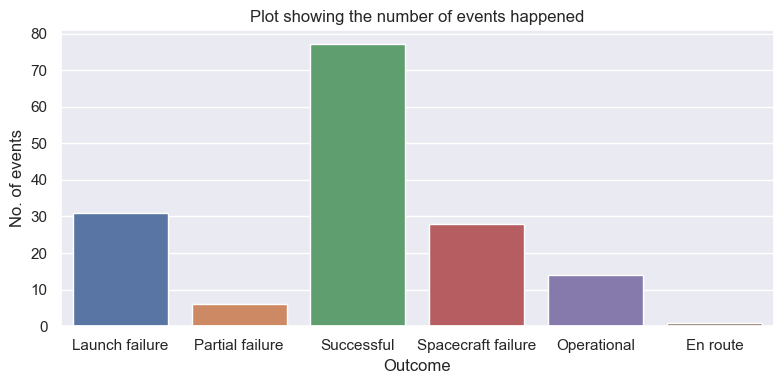

In [41]:
sns.set(rc = {'figure.figsize':(8,4)})
sns.countplot(data=df, x= 'Outcome')
plt.title("Plot showing the number of events happened")
plt.xlabel("Outcome")
plt.ylabel("No. of events")
plt.tight_layout()
plt.show()

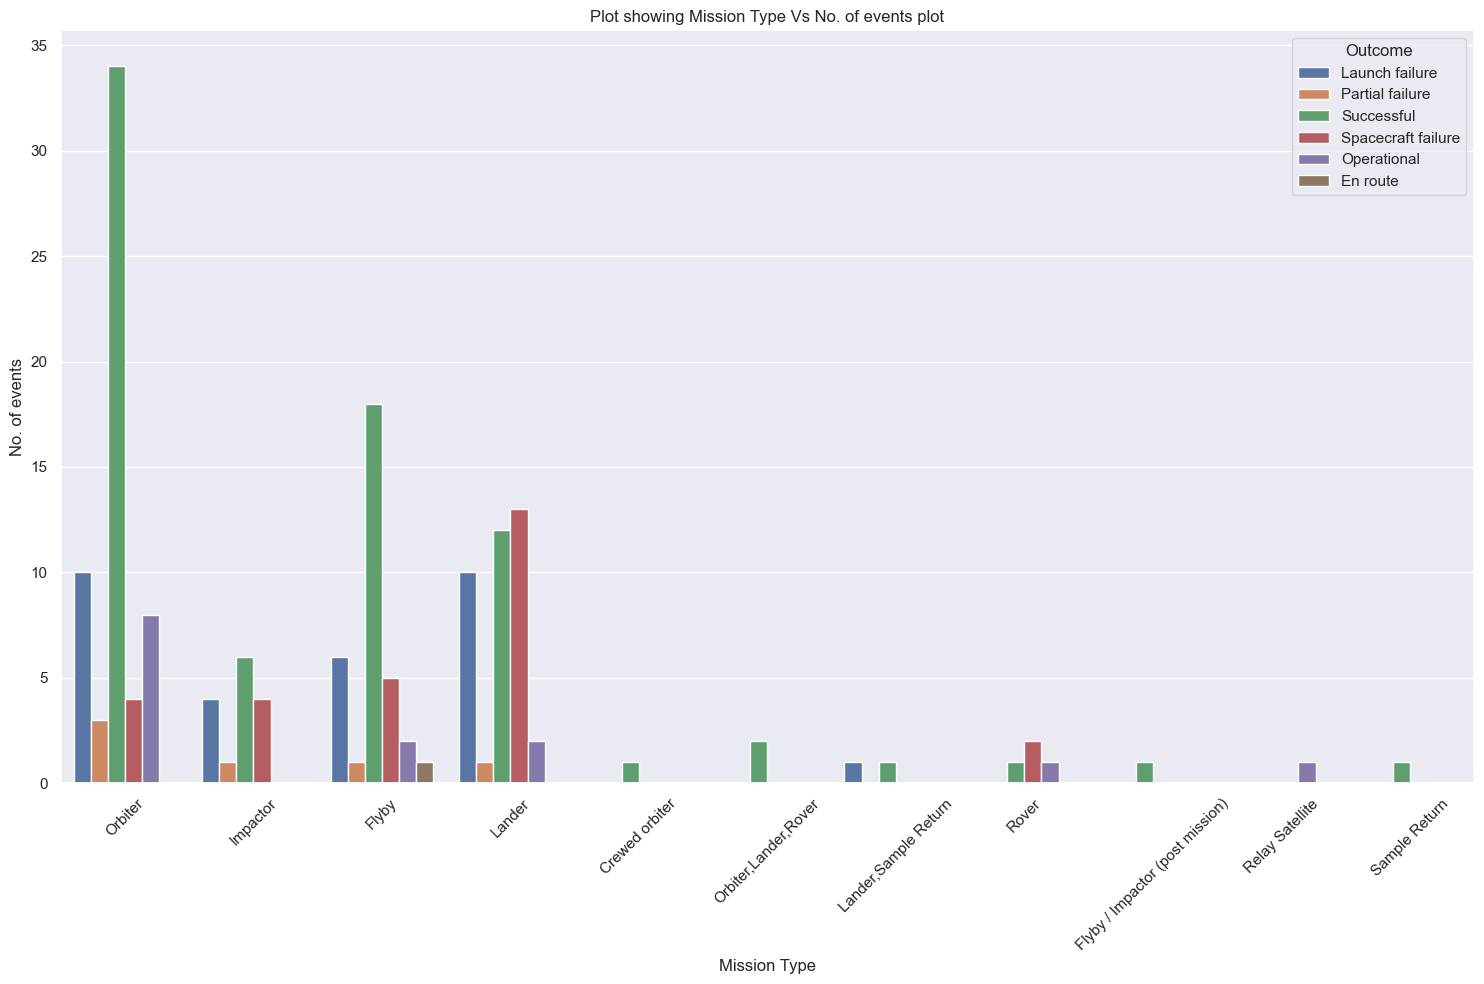

In [42]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.countplot(data=df, x= 'Mission Type', hue= 'Outcome')
plt.xticks(rotation=45)
plt.title("Plot showing Mission Type Vs No. of events plot")
plt.xlabel("Mission Type")
plt.ylabel("No. of events")
plt.tight_layout()
plt.show()

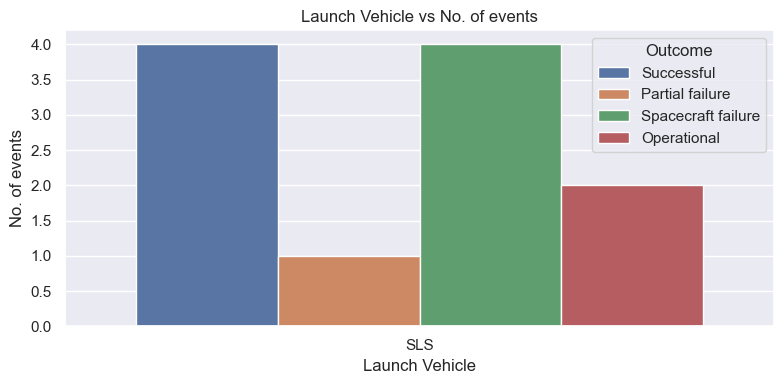

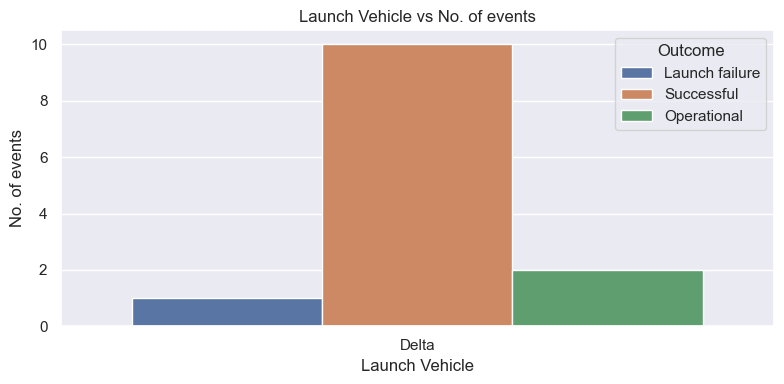

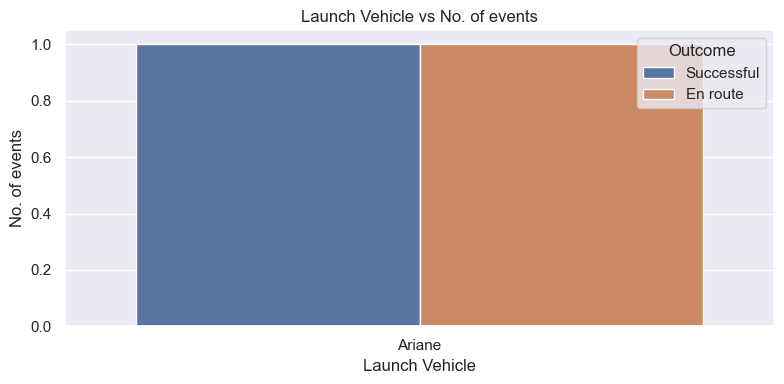

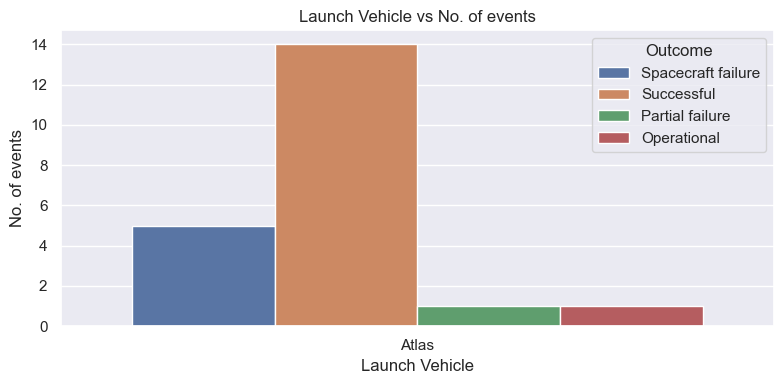

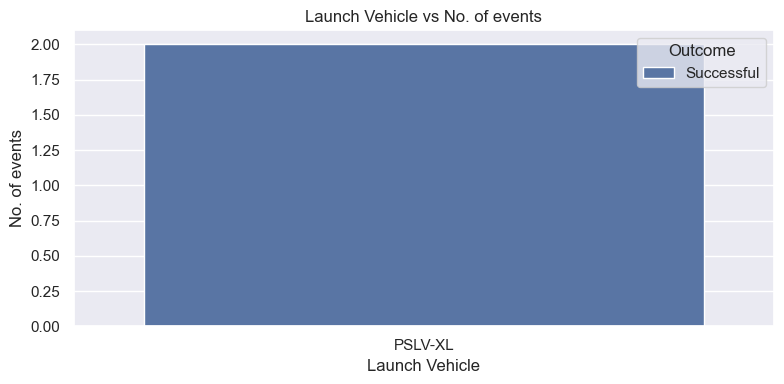

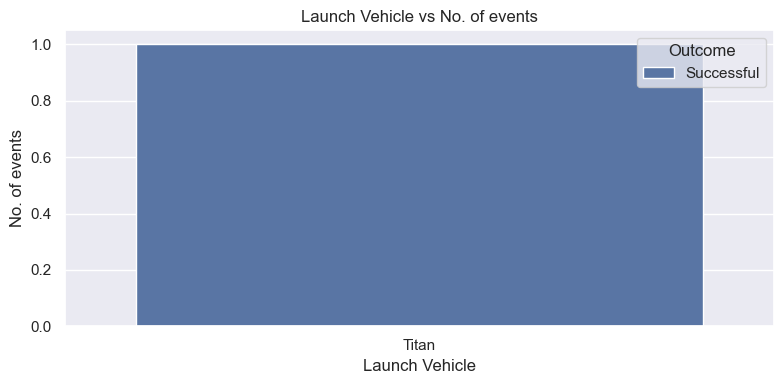

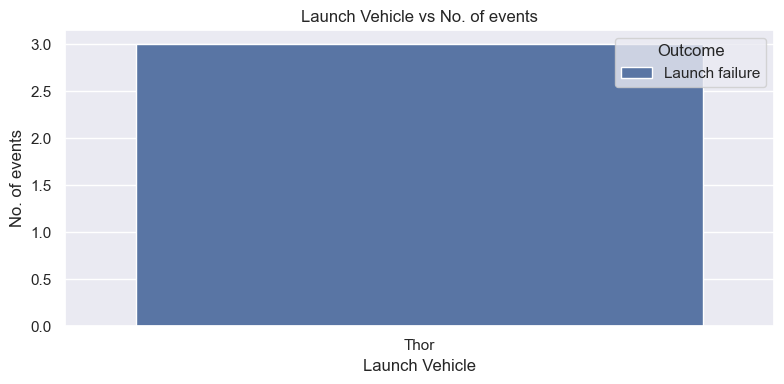

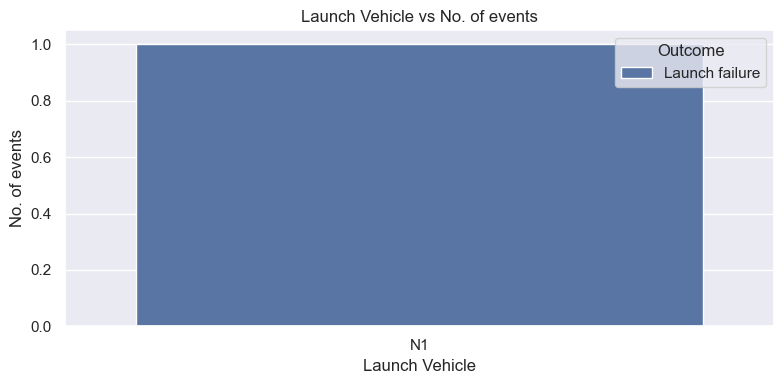

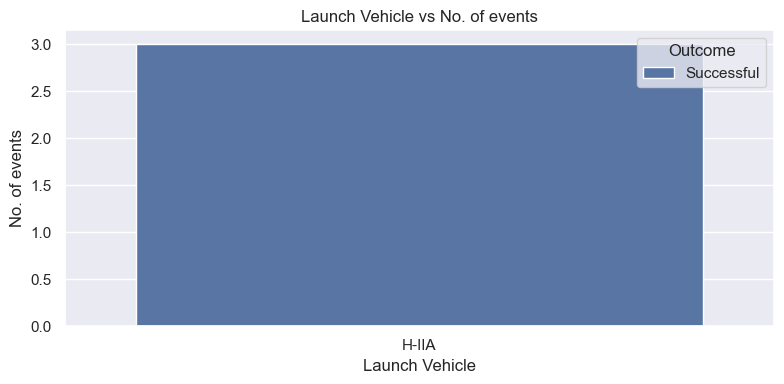

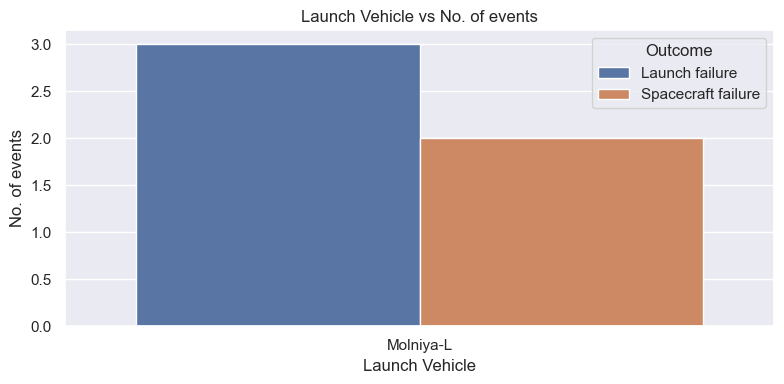

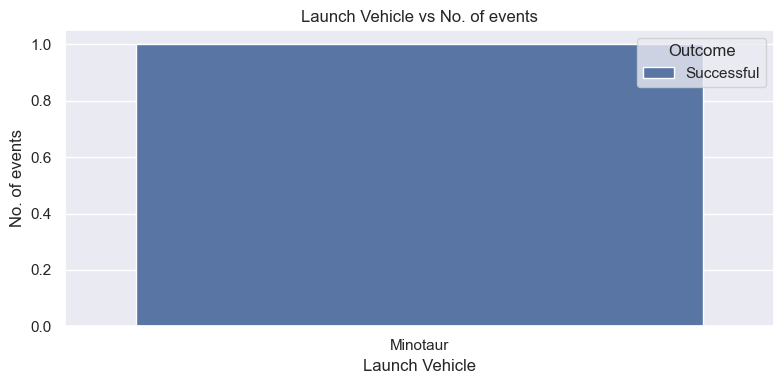

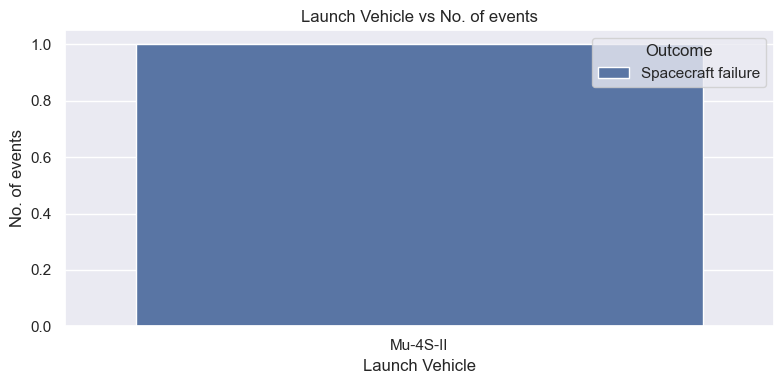

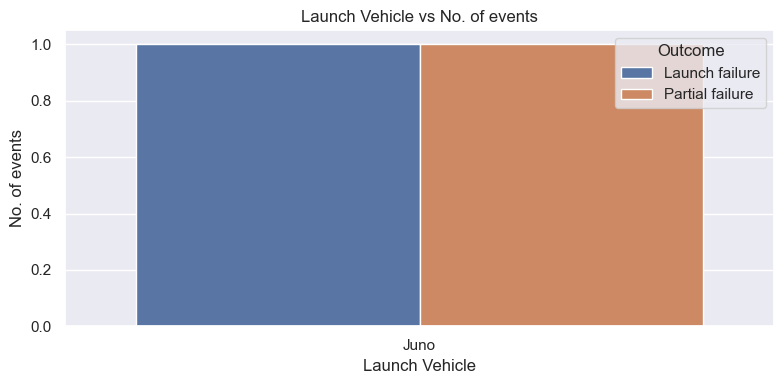

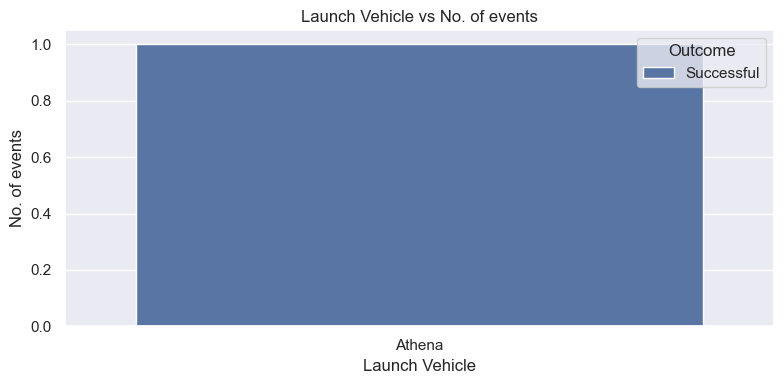

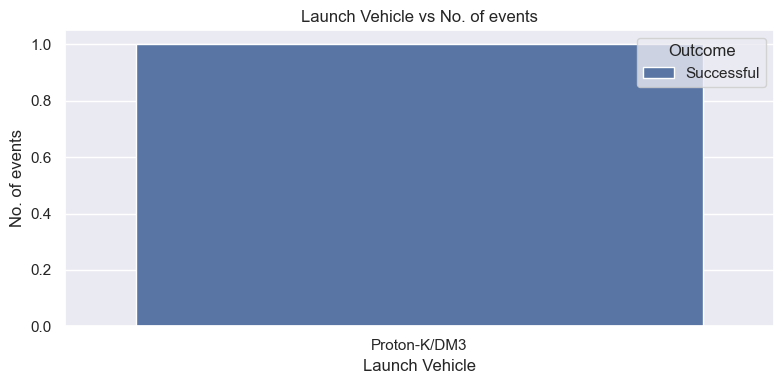

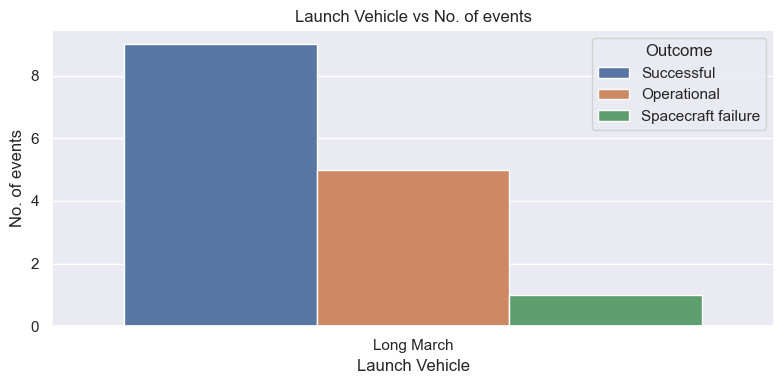

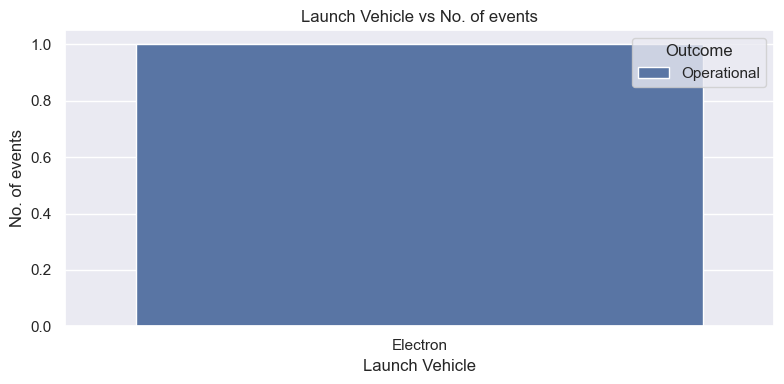

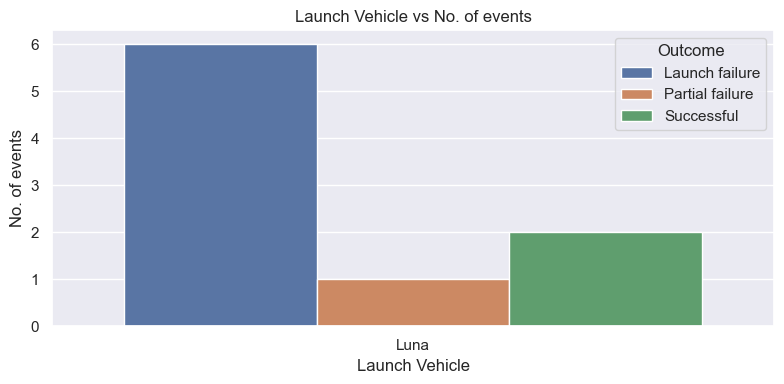

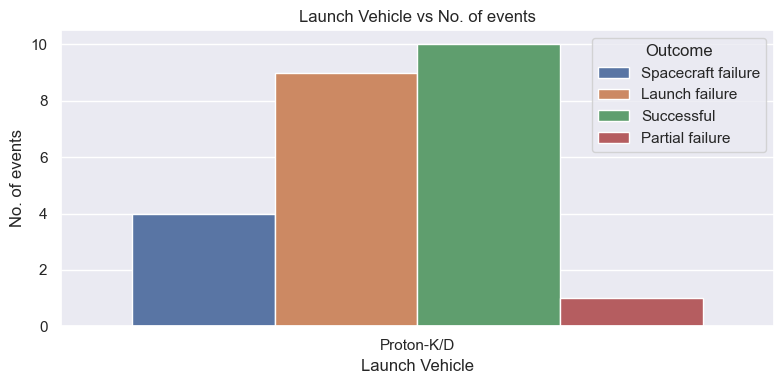

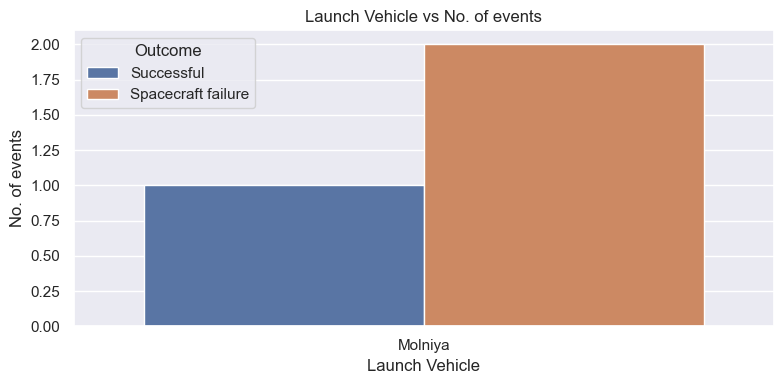

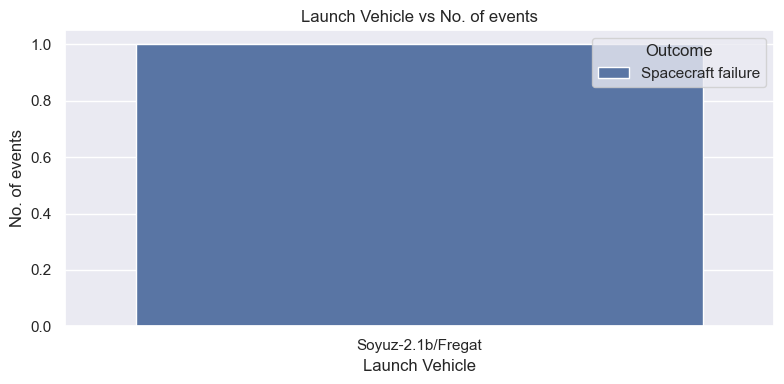

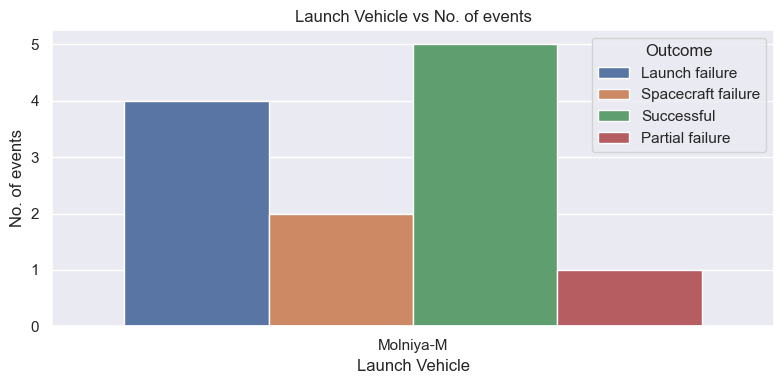

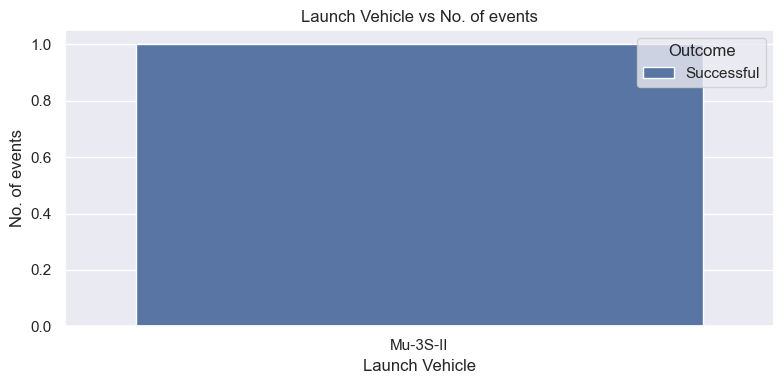

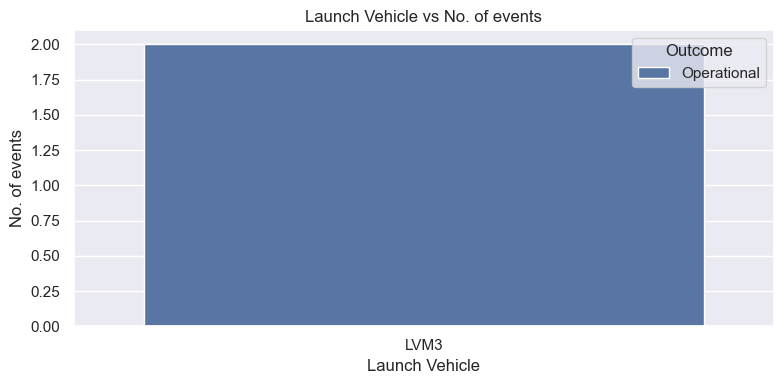

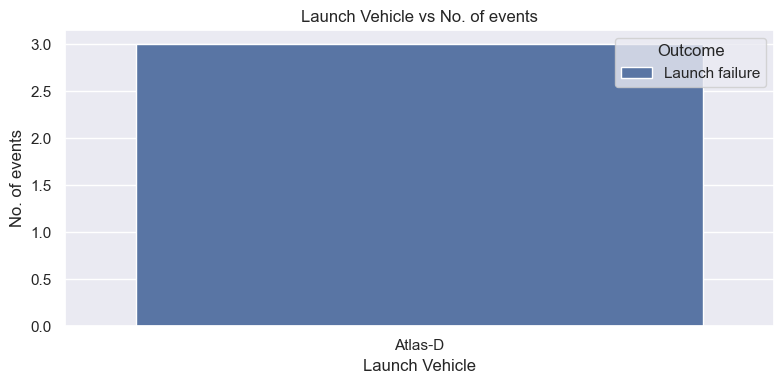

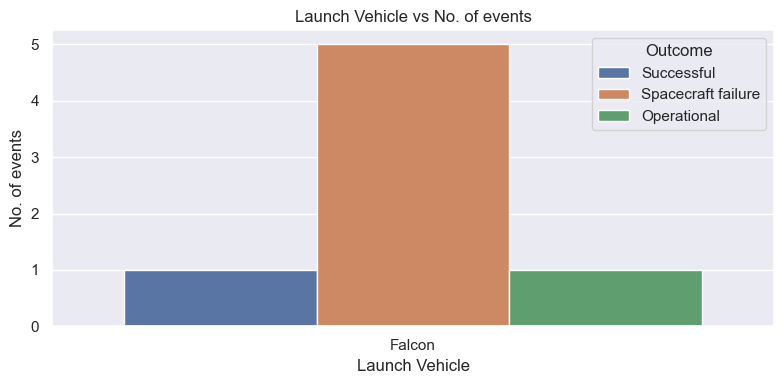

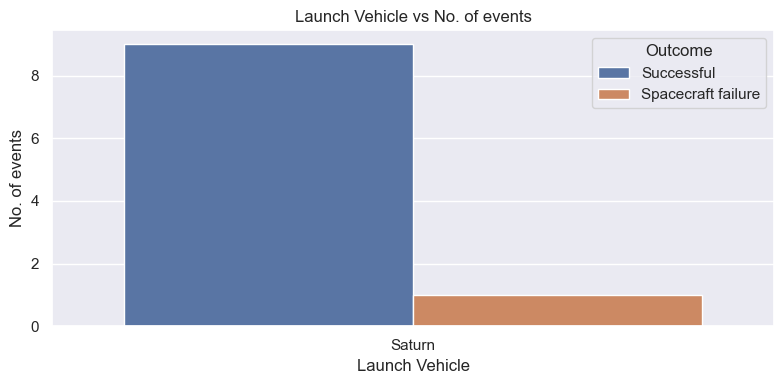

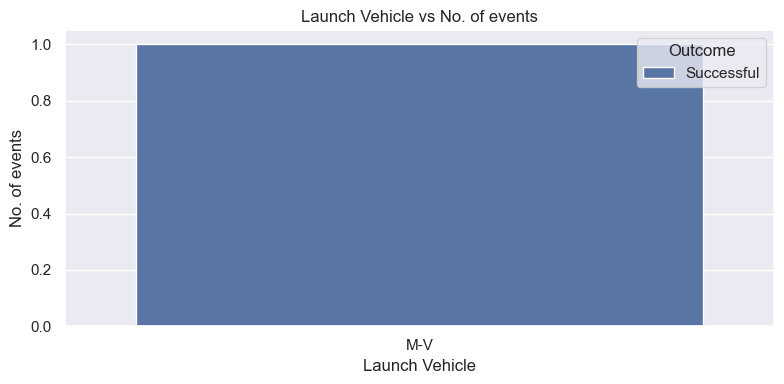

In [43]:
# "Launch Vehicle vs No. of events"
list1 = []
for i in df['launch vehicle']:
    list1.append(i)
l1= list(set(list1))
for j in l1:
    df1= df[df['launch vehicle'] == j]
    sns.set(rc = {'figure.figsize':(8,4)})
    sns.countplot(data=df1, x='launch vehicle', hue= 'Outcome')
    plt.title("Launch Vehicle vs No. of events")
    plt.xlabel("Launch Vehicle")
    plt.ylabel("No. of events")
    plt.tight_layout()
    plt.show()    

In [44]:
df['Mission Type'].unique()

array(['Orbiter', 'Impactor', 'Flyby', 'Lander', 'Crewed orbiter',
       'Orbiter,Lander,Rover', 'Lander,Sample Return', 'Rover',
       'Flyby / Impactor (post mission)', 'Relay Satellite',
       'Sample Return'], dtype=object)

In [45]:
df[df['Country'] == 'India']

,Mission,Spacecraft,Launch Date,Carrier Rocket,Mission Type,Outcome,Additional Information,Country,launch vehicle
113,Chandrayaan-1,Chandrayaan-1,22-Oct-08,PSLV-XL C11,Orbiter,Successful,"Moon Impact Probe deployed, discovered water i...",India,PSLV-XL
114,Chandrayaan-1,Moon Impact Probe,22-Oct-08,PSLV-XL C11,Impactor,Successful,"Moon Impact Probe deployed, discovered water i...",India,PSLV-XL
133,Chandrayaan-2,Chandrayaan-2 Orbiter,22-Jul-19,LVM3 M1,Orbiter,Operational,"Orbiter operational, but Lander and Rover were...",India,LVM3
156,Chandrayaan-3,Chandrayaan-3,14-Jul-23,LVM3 M4,Orbiter,Operational,Lander and rover operational. Soft-landed near...,India,LVM3


In [46]:
# Dropping the column 'Carrier Rocket' as we have transformed this feature to 'launch vehicle'
df.drop('Carrier Rocket', axis= 1, inplace =  True)

In [47]:
# Identify how many mission are currently operational
df[df['Outcome'] == 'Operational']

,Mission,Spacecraft,Launch Date,Mission Type,Outcome,Additional Information,Country,launch vehicle
107,ARTEMIS P1,ARTEMIS P1,17-Feb-07,Orbiter,Operational,Two THEMIS spacecraft moved to selenocentric o...,USA,Delta
108,ARTEMIS P2,ARTEMIS P2,17-Feb-07,Orbiter,Operational,Two THEMIS spacecraft moved to selenocentric o...,USA,Delta
115,Lunar Reconnaissance Orbiter,Lunar Reconnaissance Orbiter,18-Jun-09,Orbiter,Operational,"Entered orbit on June 23, 2009.",USA,Atlas
121,Chang'e 3,Chang'e 3,01-Dec-13,Lander,Operational,Yutu rover was deployed from Chang'e 3.,China,Long March
127,Queqiao,Queqiao relay satellite,21-May-18,Relay Satellite,Operational,Entered Earth–Moon L2 orbit to support Chang'e...,China,Long March
130,Chang'e 4,Chang'e 4,07-Dec-18,Lander,Operational,First soft landing on the far side of the Moon...,China,Long March
131,Chang'e 4,Yutu-2,07-Dec-18,Rover,Operational,First soft landing on the far side of the Moon...,China,Long March
133,Chandrayaan-2,Chandrayaan-2 Orbiter,22-Jul-19,Orbiter,Operational,"Orbiter operational, but Lander and Rover were...",India,LVM3
134,Chang'e 5,Chang'e 5 Orbiter,23-Nov-20,Orbiter,Operational,Returned lunar samples on 16 December 2020. Or...,China,Long March
138,CAPSTONE,CAPSTONE,28-Jun-22,Orbiter,Operational,Lunar orbiting CubeSat to test orbital stabili...,USA,Electron


In [48]:
df[df['Outcome'] == 'Operational'].count()

Mission                   14
Spacecraft                14
Launch Date               14
Mission Type              14
Outcome                   14
Additional Information    14
Country                   14
launch vehicle            14
dtype: int64

##### Observation
Total 14 Operational missions are currently going on.

In [49]:
# Identify how many mission are currently Successful
df[df['Outcome'] == 'Successful']

,Mission,Spacecraft,Launch Date,Mission Type,Outcome,Additional Information,Country,launch vehicle
10,Luna 2 (E-1A No.2),Luna 2,12-Sep-59,Impactor,Successful,Successful impact at 21:02 on 14 September 195...,Russia,Luna
11,Luna 3 (E-2A No.1),Luna 3,04-Oct-59,Flyby,Successful,Returned first images of the far side of the M...,Russia,Luna
25,Ranger 7,Ranger 7,28-Jul-64,Impactor,Successful,Impacted on 30 July 1964 at 13:25:48 UTC. ([27]),USA,Atlas
26,Ranger 8,Ranger 8,17-Feb-65,Impactor,Successful,Impacted on 20 February 1965 at 09:57:37 UTC. ...,USA,Atlas
28,Ranger 9,Ranger 9,21-Mar-65,Impactor,Successful,Impacted on 24 March 1965 at 14:08:20 UTC. ([2...,USA,Atlas
...,...,...,...,...,...,...,...,...
137,Chang'e 5,Chang'e 5 Returner,23-Nov-20,Sample Return,Successful,Returned lunar samples on 16 December 2020. Or...,China,Long March
140,Artemis 1,Artemis 1 Orion MPCV CM-002,16-Nov-22,Orbiter,Successful,Uncrewed test of Orion spacecraft in lunar fly...,USA,SLS
144,LunIR,LunIR,16-Nov-22,Flyby,Successful,Intended to flyby the Moon and collect surface...,USA,SLS
148,BioSentinel,BioSentinel,16-Nov-22,Flyby,Successful,CubeSat on astrobiology mission to study impac...,USA,SLS


##### Observation
1. Total 77 successful missions happened.

In [50]:
df['Outcome'].unique()

array(['Launch failure', 'Partial failure', 'Successful',
       'Spacecraft failure', 'Operational', 'En route'], dtype=object)

In [51]:
# Identify how many mission are failure be it 'Partial failure', 'Launch failure' or 'Spacecraft failure'
df[(df['Outcome'] == 'Partial failure') | (df['Outcome'] == 'Launch failure') | (df['Outcome'] == 'Spacecraft failure')]

,Mission,Spacecraft,Launch Date,Mission Type,Outcome,Additional Information,Country,launch vehicle
0,Pioneer 0 (Able I),Pioneer 0,17-Aug-58,Orbiter,Launch failure,First attempted launch beyond Earth orbit; fai...,USA,Thor
1,Luna E-1 No.1,Luna E-1 No.1,23-Sep-58,Impactor,Launch failure,Failed to orbit; rocket disintegrated due to e...,Russia,Luna
2,Pioneer 1 (Able II),Pioneer 1,11-Oct-58,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...,USA,Thor
3,Luna E-1 No.2,Luna E-1 No.2,11-Oct-58,Impactor,Launch failure,Failed to orbit; carrier rocket exploded due t...,Russia,Luna
4,Pioneer 2 (Able III),Pioneer 2,08-Nov-58,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...,USA,Thor
...,...,...,...,...,...,...,...,...
151,Hakuto-R Mission 1,Hakuto-R,11-Dec-22,Lander,Spacecraft failure,Lunar lander technology demonstration. Contact...,Japan,Falcon
152,SORA-Q,SORA-Q,11-Dec-22,Rover,Spacecraft failure,Lunar lander technology demonstration. Lost co...,Japan,Falcon
153,Emirates Lunar Mission,Rashid,11-Dec-22,Rover,Spacecraft failure,Lunar rover demonstration launched with Hakuto...,UAE,Falcon
154,Lunar Flashlight,Lunar Flashlight,11-Dec-22,Flyby,Spacecraft failure,Moved from Artemis 1 to Falcon 9. Thruster iss...,USA,Falcon


##### Observation
There are total 65 mission failure that happened

In [52]:
# Lets replace 'Partial failure', 'Launch failure' and 'Spacecraft failure' with 'Failure'
df['Outcome'].replace(['Partial failure', 'Launch failure', 'Spacecraft failure'], 'Failure', inplace= True)

In [53]:
df

,Mission,Spacecraft,Launch Date,Mission Type,Outcome,Additional Information,Country,launch vehicle
0,Pioneer 0 (Able I),Pioneer 0,17-Aug-58,Orbiter,Failure,First attempted launch beyond Earth orbit; fai...,USA,Thor
1,Luna E-1 No.1,Luna E-1 No.1,23-Sep-58,Impactor,Failure,Failed to orbit; rocket disintegrated due to e...,Russia,Luna
2,Pioneer 1 (Able II),Pioneer 1,11-Oct-58,Orbiter,Failure,Failed to orbit; premature second-stage cutoff...,USA,Thor
3,Luna E-1 No.2,Luna E-1 No.2,11-Oct-58,Impactor,Failure,Failed to orbit; carrier rocket exploded due t...,Russia,Luna
4,Pioneer 2 (Able III),Pioneer 2,08-Nov-58,Orbiter,Failure,Failed to orbit; premature second-stage cutoff...,USA,Thor
...,...,...,...,...,...,...,...,...
153,Emirates Lunar Mission,Rashid,11-Dec-22,Rover,Failure,Lunar rover demonstration launched with Hakuto...,UAE,Falcon
154,Lunar Flashlight,Lunar Flashlight,11-Dec-22,Flyby,Failure,Moved from Artemis 1 to Falcon 9. Thruster iss...,USA,Falcon
155,Jupiter Icy Moons Explorer,Jupiter Icy Moons Explorer,14-Apr-23,Flyby,En route,Will fly by the Moon in August 2024 en route t...,European,Ariane
156,Chandrayaan-3,Chandrayaan-3,14-Jul-23,Orbiter,Operational,Lander and rover operational. Soft-landed near...,India,LVM3


In [54]:
# Checking how many missions are currently in route to the targetted planet.
df[(df['Outcome'] == 'En route')]

,Mission,Spacecraft,Launch Date,Mission Type,Outcome,Additional Information,Country,launch vehicle
155,Jupiter Icy Moons Explorer,Jupiter Icy Moons Explorer,14-Apr-23,Flyby,En route,Will fly by the Moon in August 2024 en route t...,European,Ariane


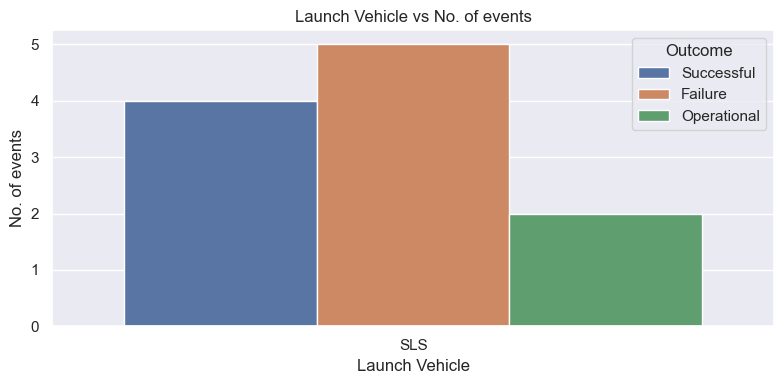

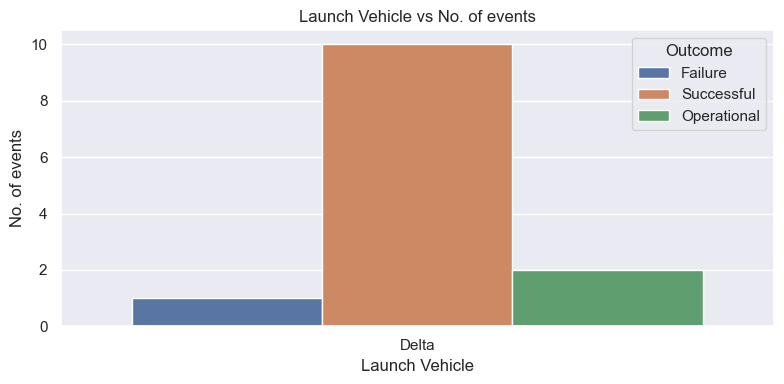

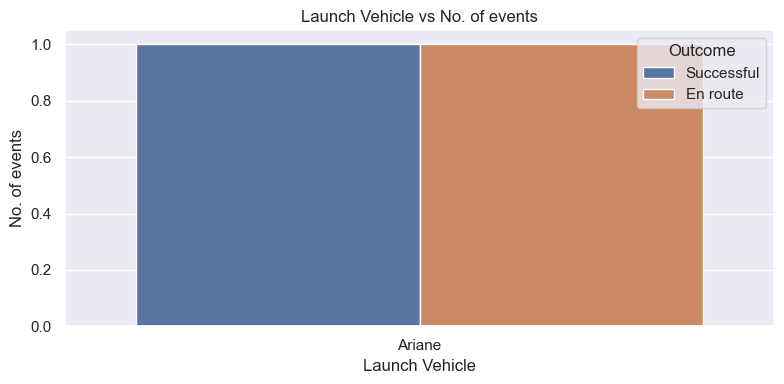

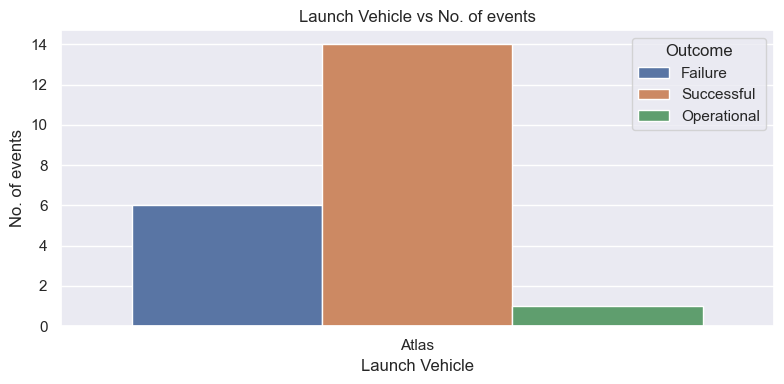

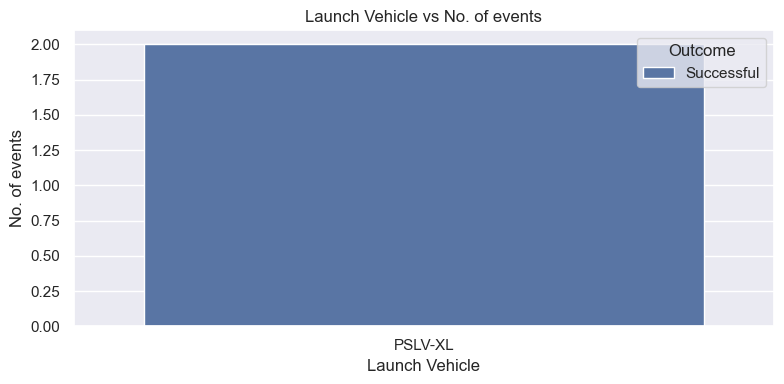

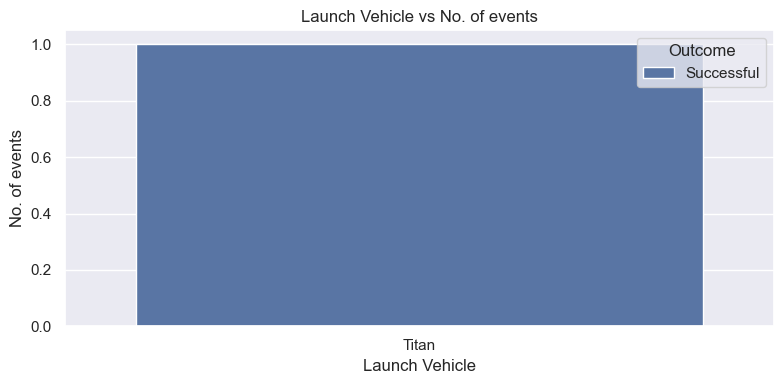

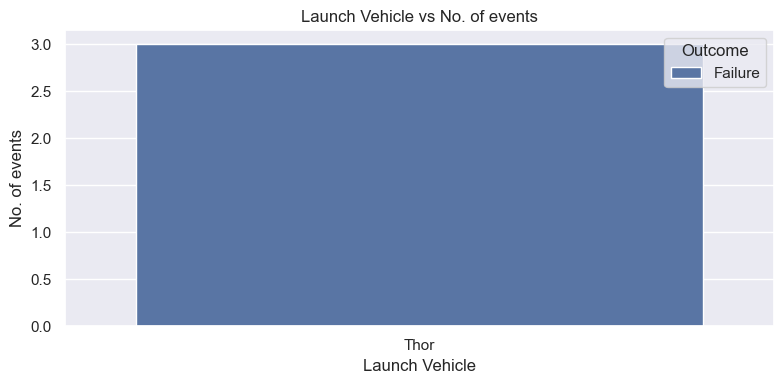

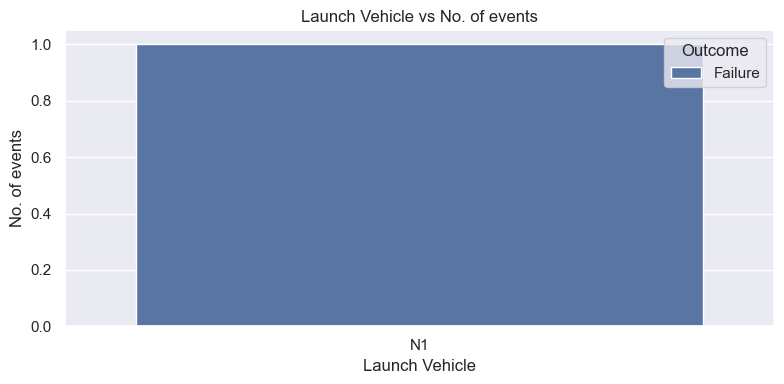

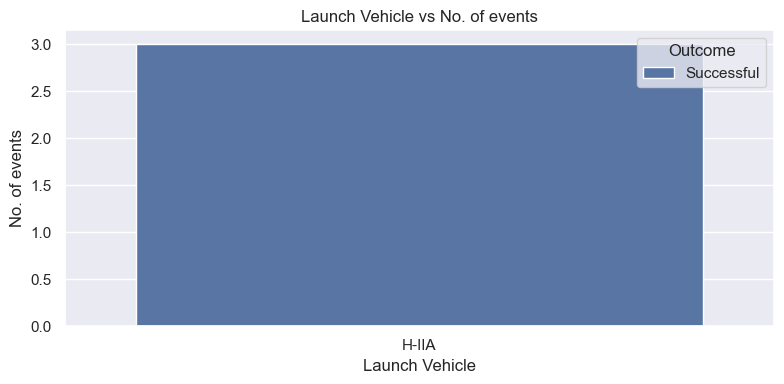

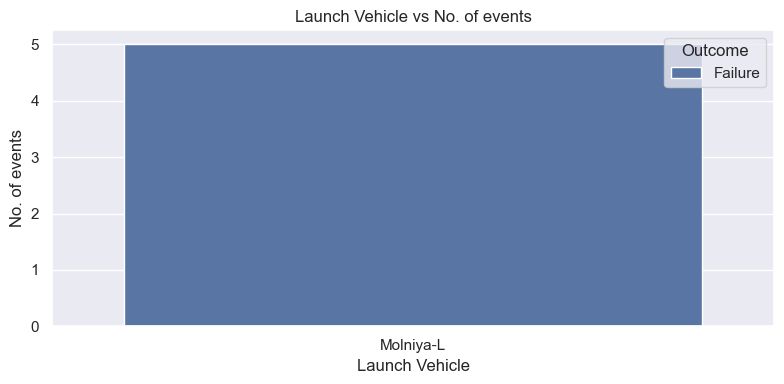

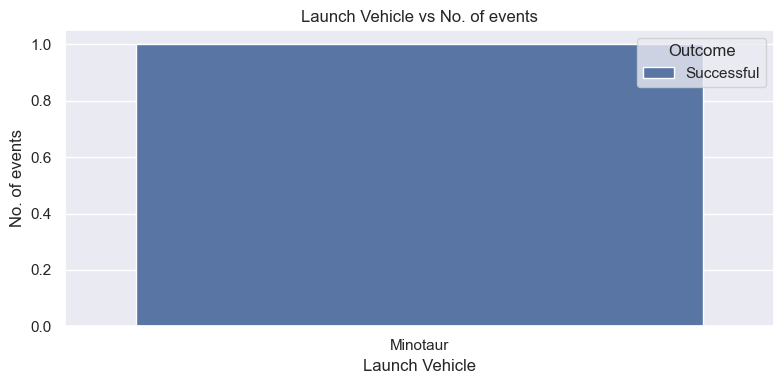

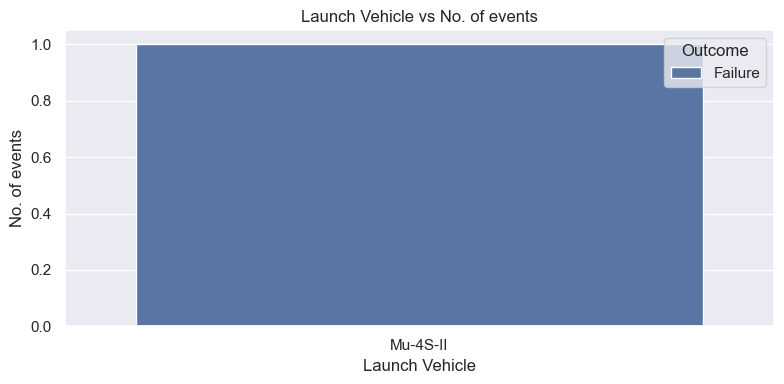

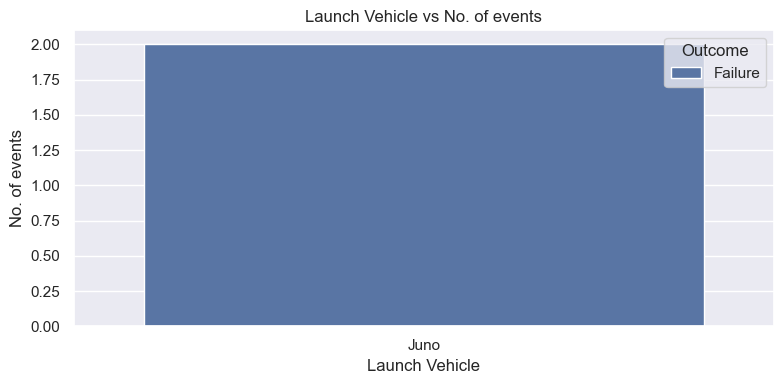

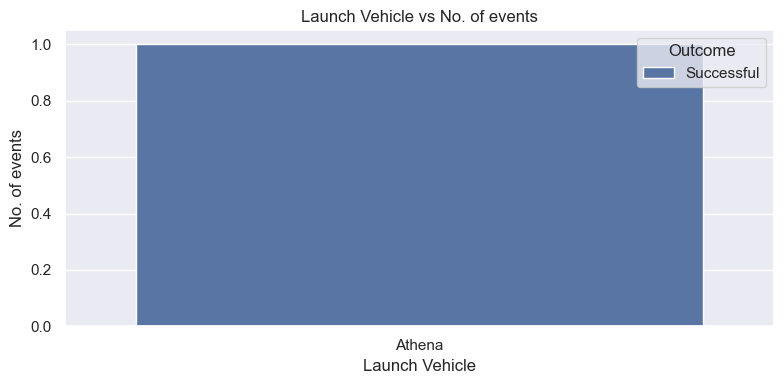

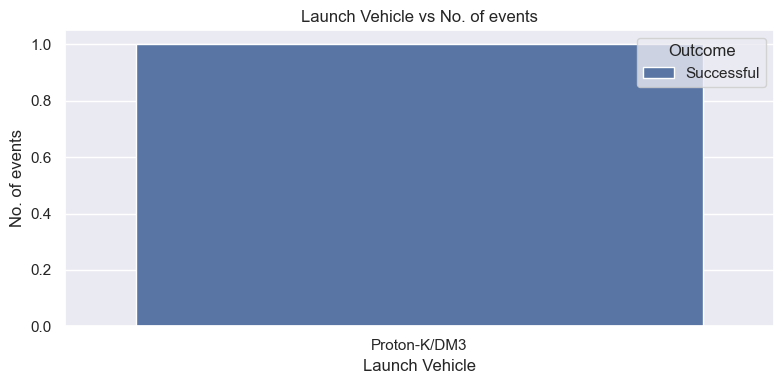

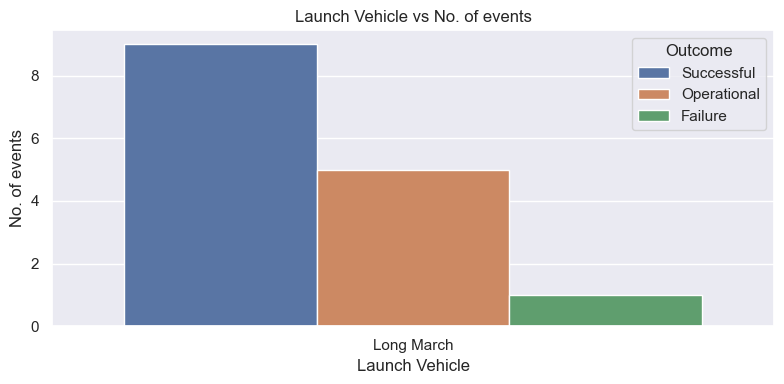

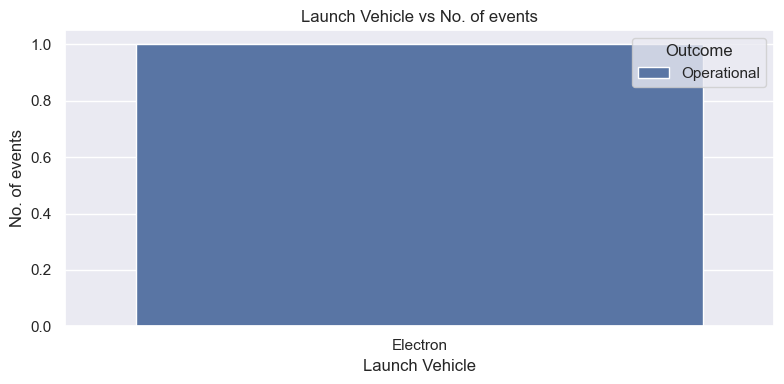

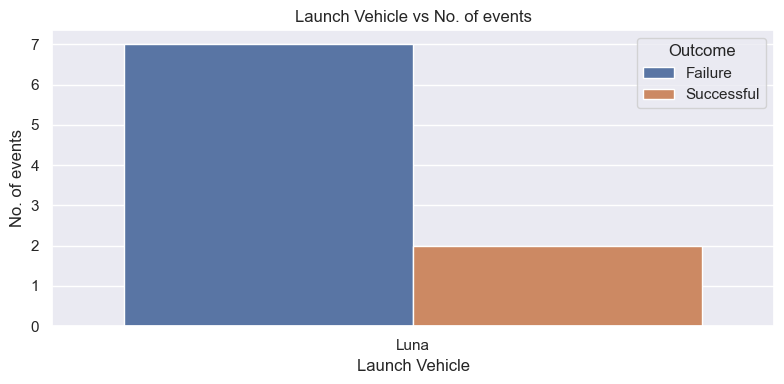

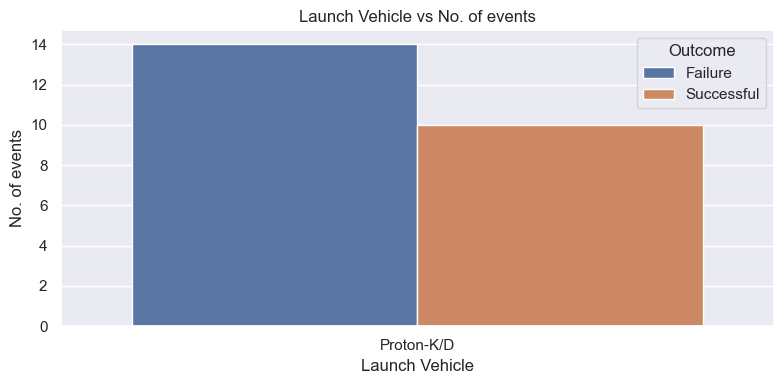

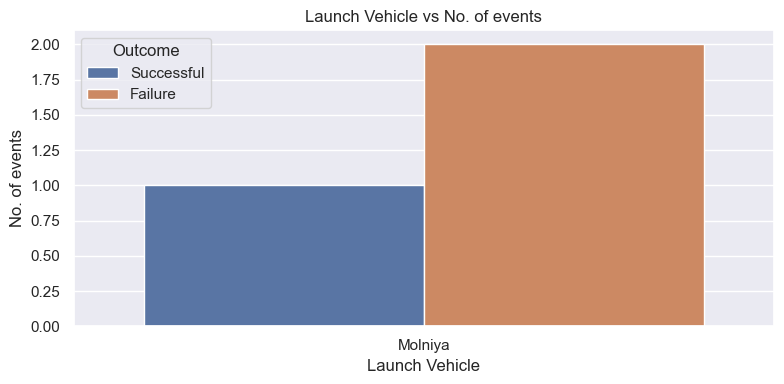

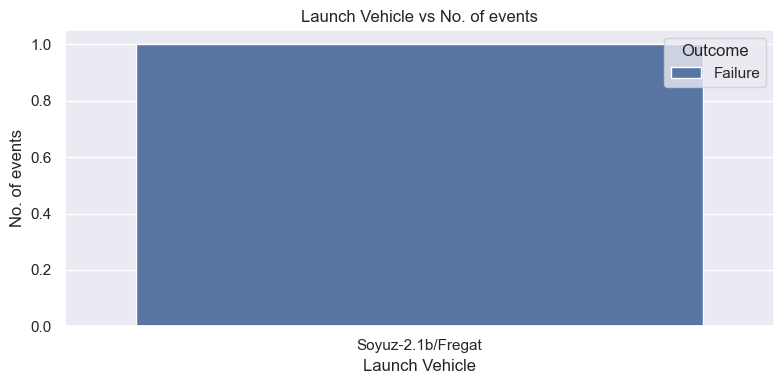

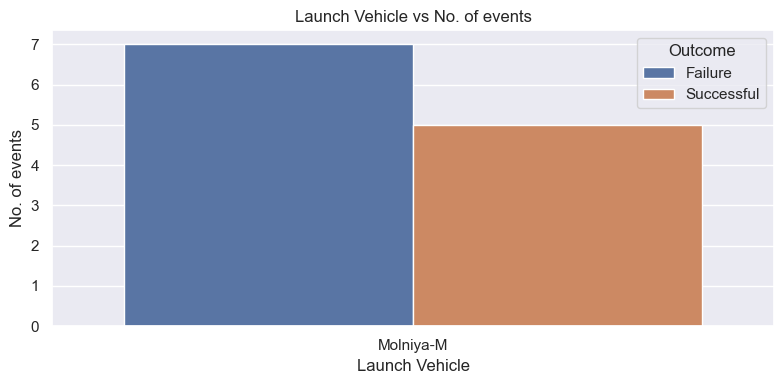

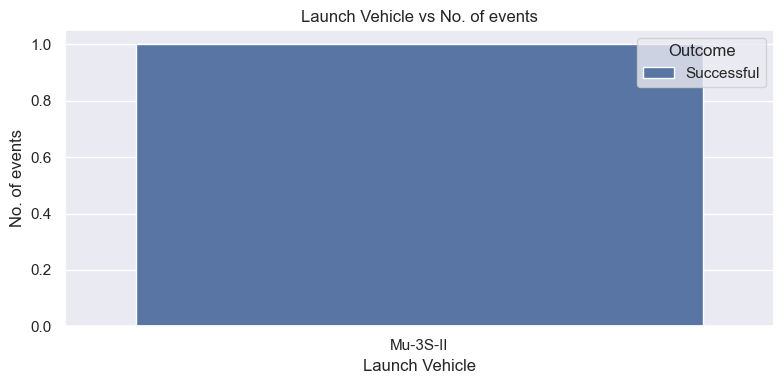

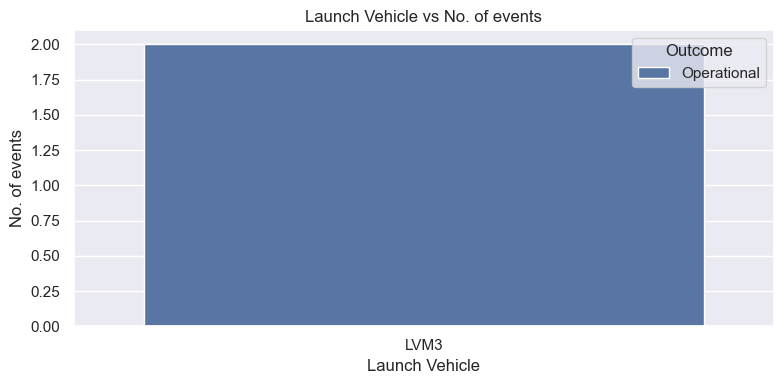

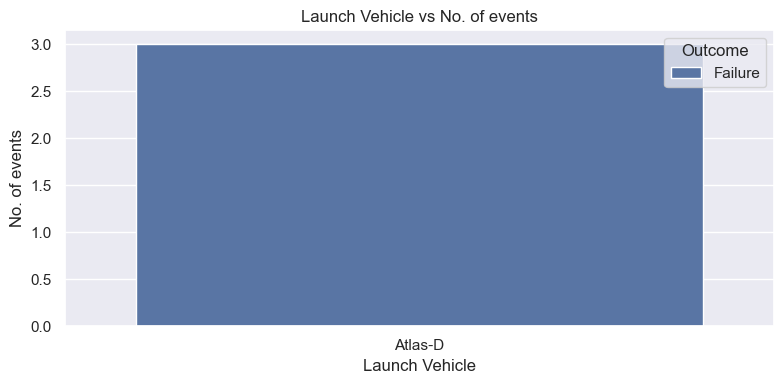

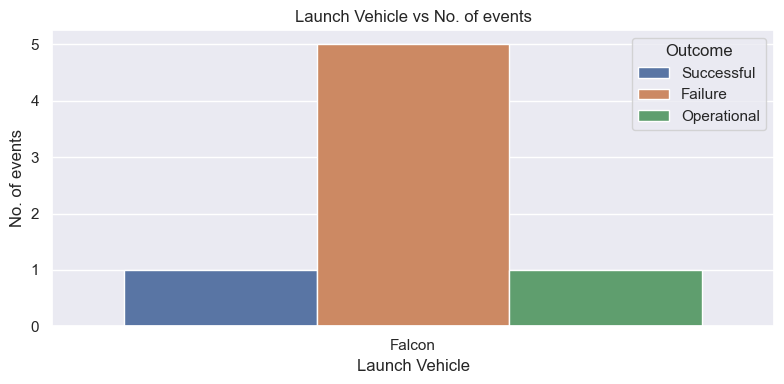

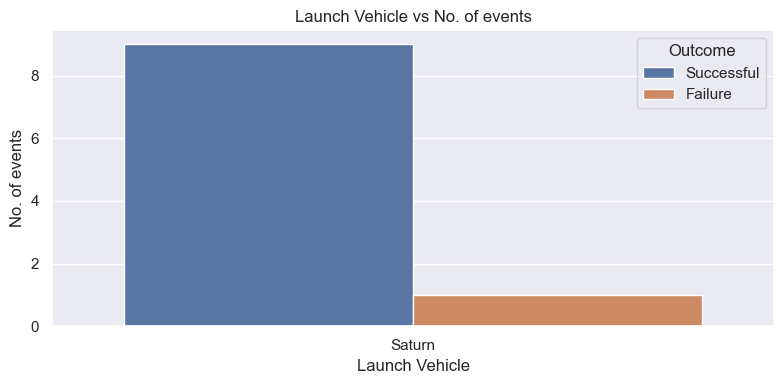

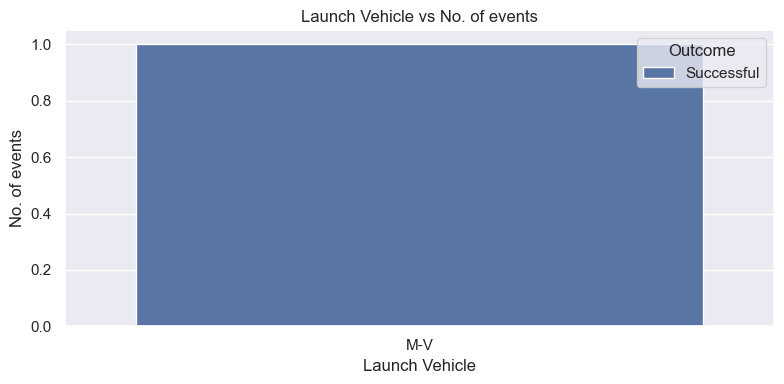

In [55]:
list1 = []
for i in df['launch vehicle']:
    list1.append(i)
l1= list(set(list1))
for j in l1:
    df1= df[df['launch vehicle'] == j]
    sns.set(rc = {'figure.figsize':(8,4)})
    sns.countplot(data=df1, x='launch vehicle', hue= 'Outcome')
    plt.title("Launch Vehicle vs No. of events")
    plt.xlabel("Launch Vehicle")
    plt.ylabel("No. of events")
    plt.tight_layout()
    plt.show()    

##### Observation:
1. Ariane is the Launch Vehicle which has 1 successful mission and 1 enroute mission
2. Falcon has 5, SLS has 5, Molniya-M has 7 and Proton-K/D has around 14 failure mission which is the highest.
3. Long march has around 9, Saturn has around 9, Delta has 10, Proton-K/D has 10, Atlas has 14 Successful missions which is the highest.

In [56]:
df['Spacecraft']= df['Spacecraft'].str.split().str[0]

In [57]:
df['Spacecraft'].unique()

array(['Pioneer', 'Luna', 'E-1A', 'Ranger', 'Kosmos', 'Zond', 'Surveyor',
       'Explorer', 'Lunar', 'Soyuz', 'Apollo', 'PFS-1', 'PFS-2',
       'Mariner', 'ISEE-3', 'Hiten', 'Hagoromo', 'Geotail', 'WIND',
       'Clementine', 'HGS-1', 'Nozomi', 'WMAP', 'SMART-1', 'STEREO',
       'ARTEMIS', 'Kaguya', 'Okina', 'Ouna', "Chang'e", 'Chandrayaan-1',
       'Moon', 'LCROSS', 'Ebb', 'Flow', 'LADEE', 'Yutu', 'Return',
       'Manfred', 'TESS', 'Queqiao', 'Longjiang-1', 'Longjiang-2',
       'Yutu-2', 'Beresheet', 'Chandrayaan-2', 'CAPSTONE', 'Danuri',
       'Artemis', 'LunaH-Map', 'ArgoMoon', 'LunIR', 'Near-Earth',
       'EQUULEUS', 'OMOTENASHI', 'BioSentinel', 'CubeSat', 'Team',
       'Hakuto-R', 'SORA-Q', 'Rashid', 'Jupiter', 'Chandrayaan-3'],
      dtype=object)

In [58]:
# Rashid is the spacecraft used by UAE
df[df['Spacecraft'] == 'Rashid']

,Mission,Spacecraft,Launch Date,Mission Type,Outcome,Additional Information,Country,launch vehicle
153,Emirates Lunar Mission,Rashid,11-Dec-22,Rover,Failure,Lunar rover demonstration launched with Hakuto...,UAE,Falcon


In [59]:
df['Launch Date']= pd.to_datetime(df['Launch Date'])

#### We can see this conversion has converted the year 1958 as 2058 and so on.. 

In [60]:
Year_valid = range(1950, 2025)
df['Launch year'] = df['Launch Date'].dt.year

In [61]:
year_list = []
for year in df['Launch year']:
    last_two_digits = int(str(year)[-2:])
    if last_two_digits > 50:
        modified_year = '19' + str(year)[2:]
        year_list.append(modified_year)
    else:
        year_list.append(year)
df['Launch year'] = year_list

In [62]:
df['Launch year']

0      1958
1      1958
2      1958
3      1958
4      1958
       ... 
153    2022
154    2022
155    2023
156    2023
157    2023
Name: Launch year, Length: 157, dtype: object

In [63]:
df.head()

,Mission,Spacecraft,Launch Date,Mission Type,Outcome,Additional Information,Country,launch vehicle,Launch year
0,Pioneer 0 (Able I),Pioneer,2058-08-17,Orbiter,Failure,First attempted launch beyond Earth orbit; fai...,USA,Thor,1958
1,Luna E-1 No.1,Luna,2058-09-23,Impactor,Failure,Failed to orbit; rocket disintegrated due to e...,Russia,Luna,1958
2,Pioneer 1 (Able II),Pioneer,2058-10-11,Orbiter,Failure,Failed to orbit; premature second-stage cutoff...,USA,Thor,1958
3,Luna E-1 No.2,Luna,2058-10-11,Impactor,Failure,Failed to orbit; carrier rocket exploded due t...,Russia,Luna,1958
4,Pioneer 2 (Able III),Pioneer,2058-11-08,Orbiter,Failure,Failed to orbit; premature second-stage cutoff...,USA,Thor,1958


In [64]:
space_mission = df

In [65]:
# Space mission happened in india
space_mission[space_mission['Country'] == 'India']

,Mission,Spacecraft,Launch Date,Mission Type,Outcome,Additional Information,Country,launch vehicle,Launch year
113,Chandrayaan-1,Chandrayaan-1,2008-10-22,Orbiter,Successful,"Moon Impact Probe deployed, discovered water i...",India,PSLV-XL,2008
114,Chandrayaan-1,Moon,2008-10-22,Impactor,Successful,"Moon Impact Probe deployed, discovered water i...",India,PSLV-XL,2008
133,Chandrayaan-2,Chandrayaan-2,2019-07-22,Orbiter,Operational,"Orbiter operational, but Lander and Rover were...",India,LVM3,2019
156,Chandrayaan-3,Chandrayaan-3,2023-07-14,Orbiter,Operational,Lander and rover operational. Soft-landed near...,India,LVM3,2023


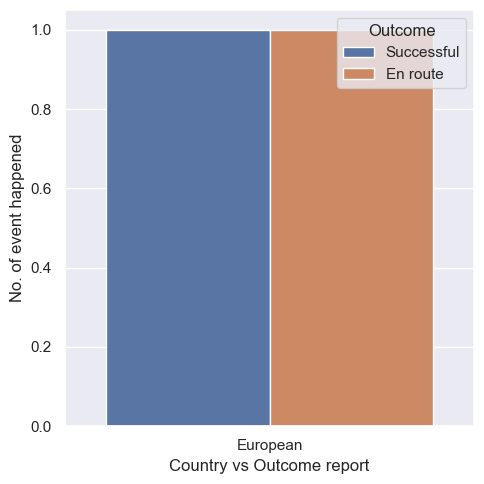

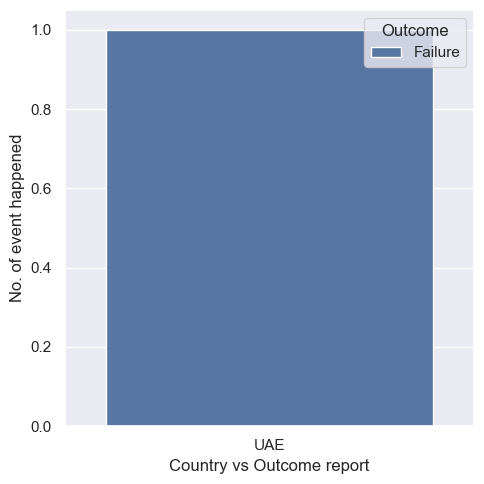

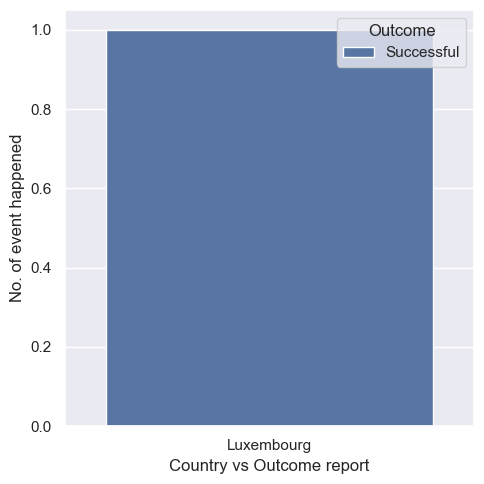

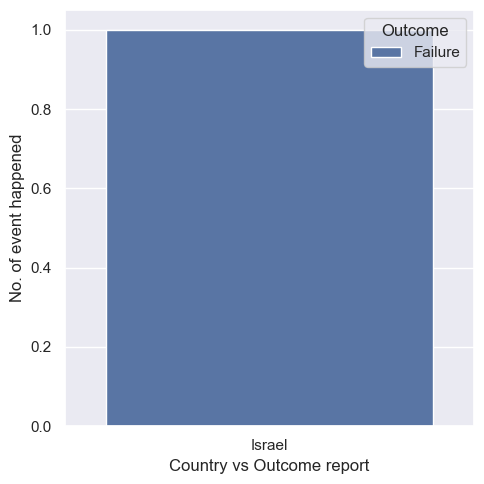

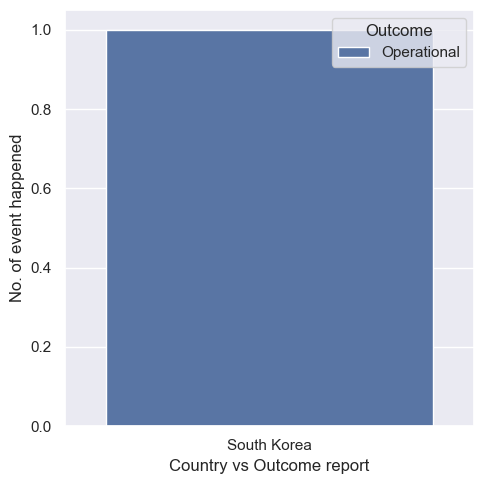

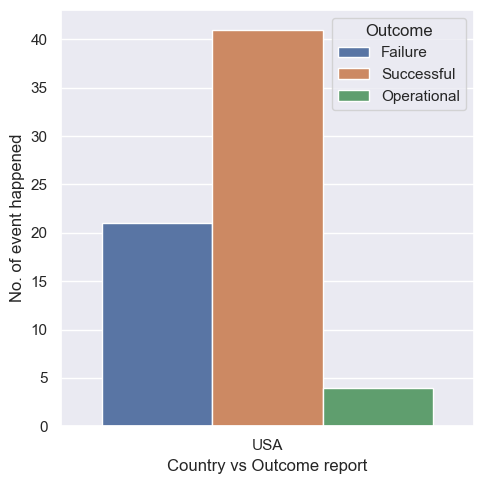

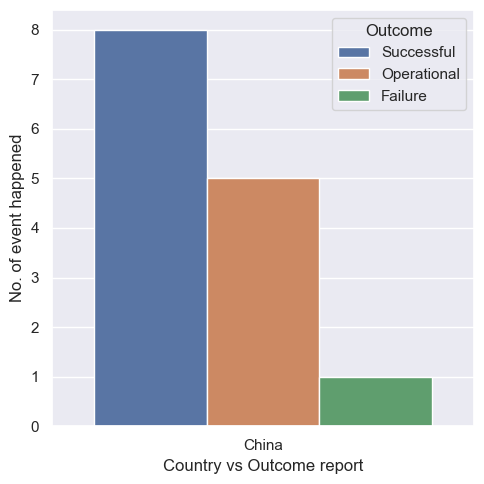

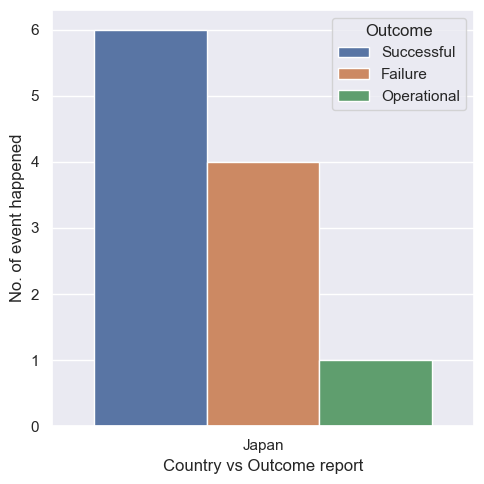

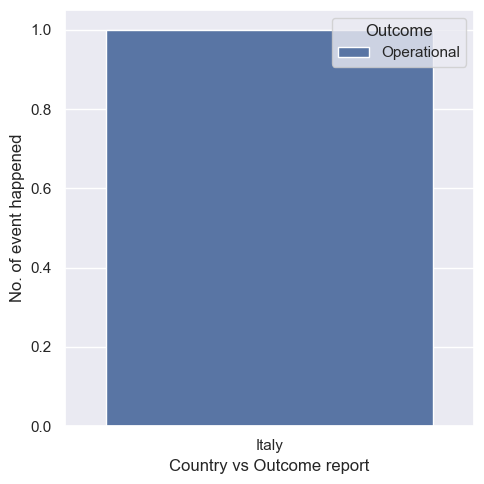

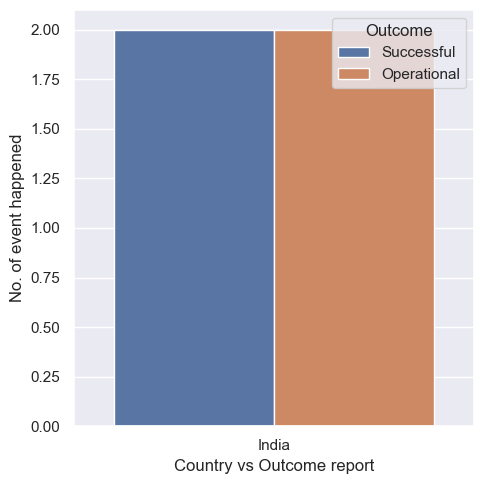

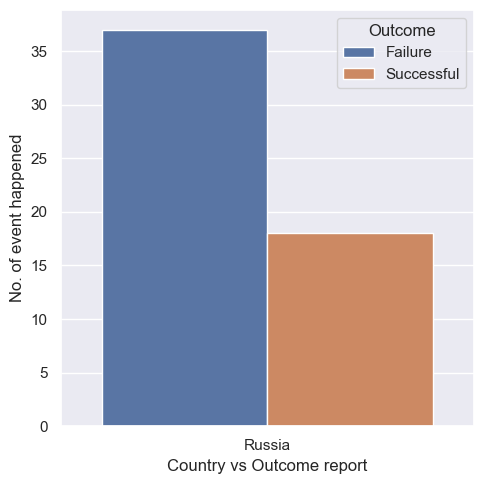

In [66]:
# Plot to show the space mission by each country with respect to the outcome happened.
list1= []
for i in space_mission['Country']:
    list1.append(i)
Country_Name=list(set(list1))
for i in Country_Name:
    df1 = space_mission[space_mission['Country'] == i]
    sns.set(rc = {'figure.figsize':(5,5)})
    sns.countplot(data= df1, x= 'Country', hue= 'Outcome')
    plt.xlabel("Country vs Outcome report")
    plt.ylabel("No. of event happened")
    plt.tight_layout()
    plt.show()
    

##### Observations
1. USA has very high number of missions where 40 missions are successful and 20+ mission failure.
2. China has 8 Successfull missions, where only 1 mission failed.
3. Russia has 35+ successful missions and 15+ failed missions
4. India has 2 successful missions and 2 operational missions.

Text(0, 0.5, 'No. of events happened')

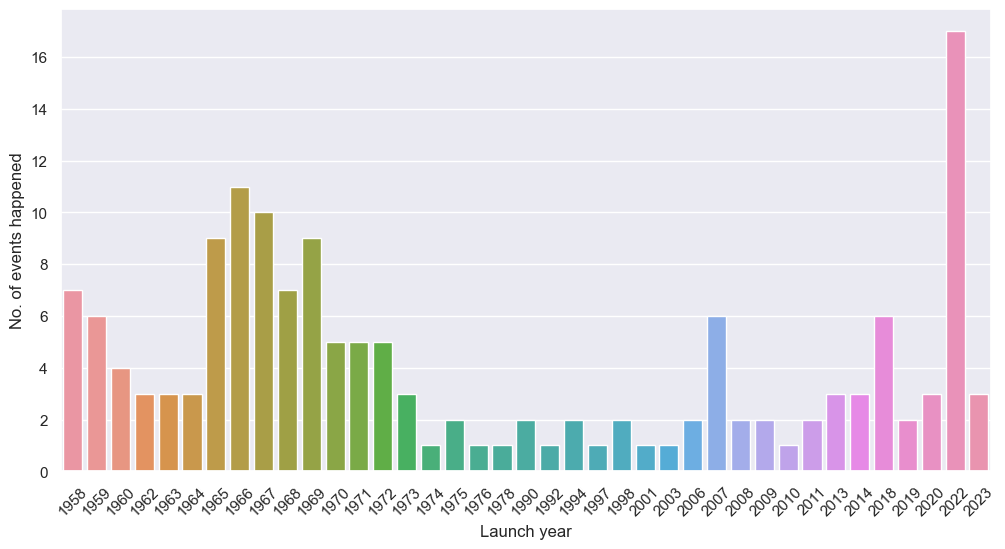

In [67]:
# Lets plot the no. of missions launched per year.
sns.set(rc= {'figure.figsize':(12,6)})
sns.countplot(data=space_mission, x='Launch year' )
plt.xticks(rotation= 45)
plt.xlabel("Launch year")
plt.ylabel("No. of events happened")

##### Observations
1. Highest no. of space missions happedned in the year 2022, around 16+
2. Between year 1965 to 1972, there were many mission which took place.
3. There were 6 missions happened in the year 2007 and 2018.


### If the outcome is operational then we could consider that mission to be successful as it was not a failure at the time of launch. Also We can now devide outcome into successfull and failure. Operational --> Successfull. Also we have to drop en-route outcome for now 

In [68]:
space_mission[space_mission['Outcome'] == 'En route']

,Mission,Spacecraft,Launch Date,Mission Type,Outcome,Additional Information,Country,launch vehicle,Launch year
155,Jupiter Icy Moons Explorer,Jupiter,2023-04-14,Flyby,En route,Will fly by the Moon in August 2024 en route t...,European,Ariane,2023


In [69]:
space_mission.drop(155, axis=0, inplace= True)
space_mission['Outcome'].replace('Operational','Successful', inplace= True)

In [70]:
space_mission['Outcome'].unique()

array(['Failure', 'Successful'], dtype=object)

<Axes: xlabel='Outcome', ylabel='count'>

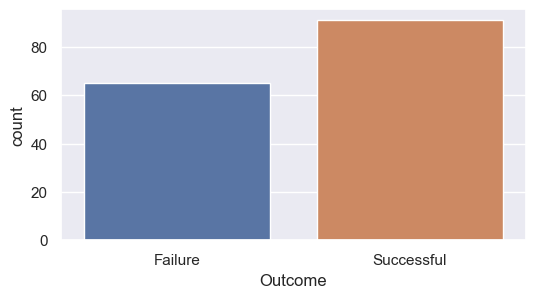

In [71]:
sns.set(rc= {'figure.figsize':(6,3)})
sns.countplot(data= space_mission, x= 'Outcome')

#### Observation:
1. After conversion we have 80+ successful missions so far.
2. failure missions are in between 60 to 70 in counts.

In [72]:
space_mission.head(5)

,Mission,Spacecraft,Launch Date,Mission Type,Outcome,Additional Information,Country,launch vehicle,Launch year
0,Pioneer 0 (Able I),Pioneer,2058-08-17,Orbiter,Failure,First attempted launch beyond Earth orbit; fai...,USA,Thor,1958
1,Luna E-1 No.1,Luna,2058-09-23,Impactor,Failure,Failed to orbit; rocket disintegrated due to e...,Russia,Luna,1958
2,Pioneer 1 (Able II),Pioneer,2058-10-11,Orbiter,Failure,Failed to orbit; premature second-stage cutoff...,USA,Thor,1958
3,Luna E-1 No.2,Luna,2058-10-11,Impactor,Failure,Failed to orbit; carrier rocket exploded due t...,Russia,Luna,1958
4,Pioneer 2 (Able III),Pioneer,2058-11-08,Orbiter,Failure,Failed to orbit; premature second-stage cutoff...,USA,Thor,1958


In [73]:
# Dropping columns like - Launch Date, Additional Information
space_mission.drop(['Launch Date', 'Additional Information'], axis = 1, inplace = True)

In [74]:
space_mission.head(5)

,Mission,Spacecraft,Mission Type,Outcome,Country,launch vehicle,Launch year
0,Pioneer 0 (Able I),Pioneer,Orbiter,Failure,USA,Thor,1958
1,Luna E-1 No.1,Luna,Impactor,Failure,Russia,Luna,1958
2,Pioneer 1 (Able II),Pioneer,Orbiter,Failure,USA,Thor,1958
3,Luna E-1 No.2,Luna,Impactor,Failure,Russia,Luna,1958
4,Pioneer 2 (Able III),Pioneer,Orbiter,Failure,USA,Thor,1958


In [75]:
space_mission['Mission Type'].unique()

array(['Orbiter', 'Impactor', 'Flyby', 'Lander', 'Crewed orbiter',
       'Orbiter,Lander,Rover', 'Lander,Sample Return', 'Rover',
       'Flyby / Impactor (post mission)', 'Relay Satellite',
       'Sample Return'], dtype=object)

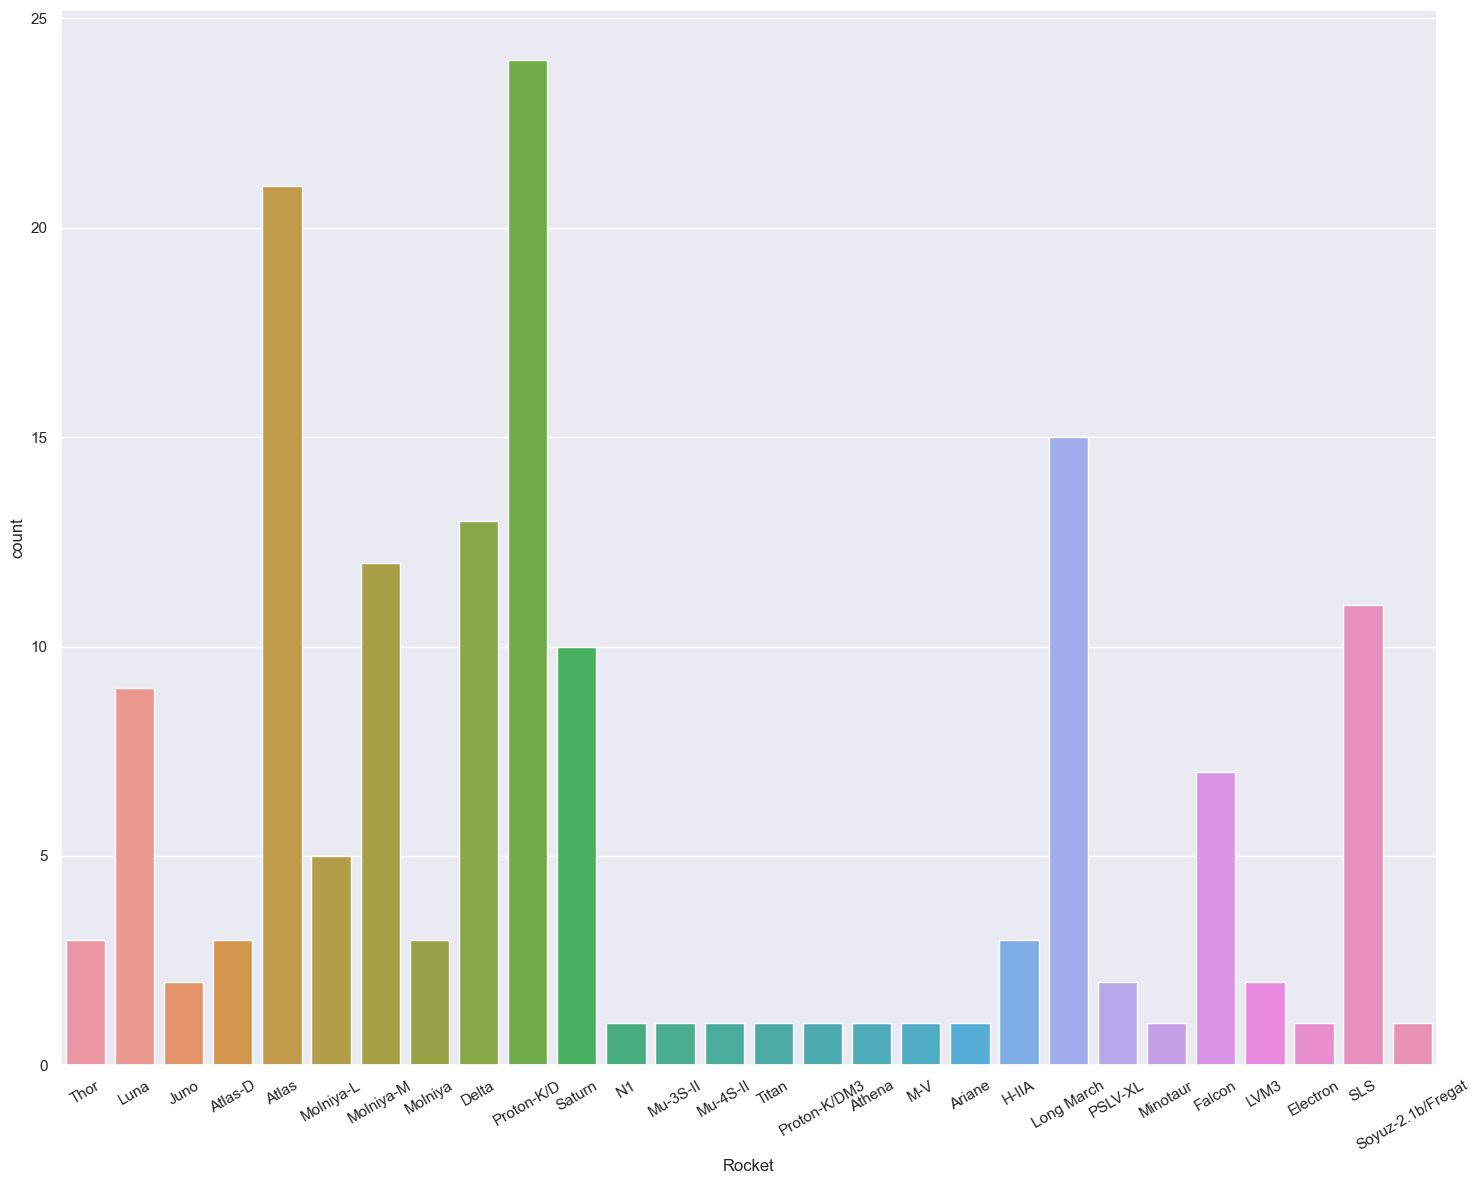

In [76]:
# check which rocket has been used and how many times.
sns.set(rc= {'figure.figsize':(15,12)})
sns.countplot(data=space_mission, x= 'launch vehicle')
plt.xticks(rotation=30)
plt.xlabel("Rocket")
plt.tight_layout()

##### Observation:
1. Rocket 'Proton-K/D' is used most of the time, aprox 22+ times
2. Atlas rockets have been used more than 20 times.
3. At the third place, Long March rocket was used, that is more than 15 times.

In [77]:
# lets save the modified CSV for future use
df.to_csv('data/data_cleaned_before_SM', index= False)

In [78]:
space_mission.to_csv('data/space_mission', index= False)

In [79]:
df

,Mission,Spacecraft,Mission Type,Outcome,Country,launch vehicle,Launch year
0,Pioneer 0 (Able I),Pioneer,Orbiter,Failure,USA,Thor,1958
1,Luna E-1 No.1,Luna,Impactor,Failure,Russia,Luna,1958
2,Pioneer 1 (Able II),Pioneer,Orbiter,Failure,USA,Thor,1958
3,Luna E-1 No.2,Luna,Impactor,Failure,Russia,Luna,1958
4,Pioneer 2 (Able III),Pioneer,Orbiter,Failure,USA,Thor,1958
...,...,...,...,...,...,...,...
152,SORA-Q,SORA-Q,Rover,Failure,Japan,Falcon,2022
153,Emirates Lunar Mission,Rashid,Rover,Failure,UAE,Falcon,2022
154,Lunar Flashlight,Lunar,Flyby,Failure,USA,Falcon,2022
156,Chandrayaan-3,Chandrayaan-3,Orbiter,Successful,India,LVM3,2023
